<a href="https://colab.research.google.com/github/killiganni/Data-Science-ML-Repository/blob/main/Project_UoL-LSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Required Packages and Libraries

In [ ]:
install.packages("mltools", quiet=TRUE)
library(mltools)
install.packages("data.table", quiet=TRUE)
library(data.table)
install.packages("caret", quiet=TRUE)
library(caret)
install.packages("nnet", quiet=TRUE)
library(nnet)
install.packages("e1071", quiet=TRUE)
library(e1071)
install.packages("ggplot2",quiet=TRUE)
library(ggplot2)
install.packages("reshape2",quiet=TRUE)
library(reshape2)
install.packages("kernlab",quiet=TRUE)
library(kernlab)
install.packages("ranger",quiet=TRUE)
library(ranger)
install.packages("dplyr",quiet=TRUE)
library(dplyr)
install.packages("adabag",quiet=TRUE)
library(adabag)
install.packages("plyr",quiet=TRUE)
library(plyr)
install.packages("bst",quiet=TRUE)
library(bst)
install.packages("xgboost",quiet=TRUE)
library(xgboost)
install.packages("elasticnet",quiet=TRUE)
library(elasticnet)
install.packages("glmnet",quiet=TRUE)
library(glmnet)
install.packages("Matrix",quiet=TRUE)
library(Matrix)
install.packages("mgcv",quiet=TRUE)
library(mgcv)
install.packages("party",quiet=TRUE)
library(party)
install.packages("mboost",quiet=TRUE)
library(mboost)
install.packages("partykit",quiet=TRUE)
library(partykit)
install.packages("tidyverse",quiet=TRUE)
library(tidyverse)
install.packages("cluster",quiet=TRUE)
library(cluster)    
install.packages("factoextra",quiet=TRUE)
library(factoextra) 

if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("PCAtools")

install.packages("PCAtools",quiet=TRUE)
library(PCAtools)

# PART 1: UNSUPERVISED LEARNING

## Brief Exploratory Data Analysis (EDA)

In [ ]:
# Extracting data and deleting NA values
ewcs=read.table("EWCS_2016.csv",sep=",",header=TRUE)
ewcs[,][ewcs[, ,] == -999] <- NA
kk=complete.cases(ewcs)
ewcs=ewcs[kk,]

In [ ]:
# Analyzing data structure
head(ewcs,10)

Q2a Q2b Q87a Q87b Q87c Q87d Q87e Q90a Q90b Q90c Q90f
1  1   63  3    3    3    3    3    2    2    2    2   
2  2   58  2    3    2    3    2    2    3    2    2   
3  2   32  2    2    3    2    3    2    2    2    2   
4  1   35  3    2    2    2    3    2    2    2    2   
5  2   27  2    2    3    3    2    2    4    2    2   
6  1   19  2    2    2    2    3    2    1    2    1   
7  1   23  2    3    3    3    3    1    1    2    1   
8  2   24  3    3    1    2    3    2    2    2    1   
9  2   22  3    3    2    2    3    2    1    2    1   
10 2   54  3    2    2    3    3    3    2    3    1

In [ ]:
# Analyzing data structure
str(ewcs)

'data.frame':	7647 obs. of  11 variables:
 $ Q2a : int  1 2 2 1 2 1 1 2 2 2 ...
 $ Q2b : int  63 58 32 35 27 19 23 24 22 54 ...
 $ Q87a: int  3 2 2 3 2 2 2 3 3 3 ...
 $ Q87b: int  3 3 2 2 2 2 3 3 3 2 ...
 $ Q87c: int  3 2 3 2 3 2 3 1 2 2 ...
 $ Q87d: int  3 3 2 2 3 2 3 2 2 3 ...
 $ Q87e: int  3 2 3 3 2 3 3 3 3 3 ...
 $ Q90a: int  2 2 2 2 2 2 1 2 2 3 ...
 $ Q90b: int  2 3 2 2 4 1 1 2 1 2 ...
 $ Q90c: int  2 2 2 2 2 2 2 2 2 3 ...
 $ Q90f: int  2 2 2 2 2 1 1 1 1 1 ...


In [ ]:
# Scaling the data to have zero mean and unit standard deviation
ewcs <- round(scale(ewcs), 3)
ewcs <- as.data.frame(ewcs)

## Principal Component Analysis

In [ ]:
# SOME PART OF THE ANALYSIS HERE IS TAKEN FROM "INTRODUCTION TO STATISTICAL LEARNING" (Hastie, Tibshirani).
# All the analysis I have done by myself. Though some of the techniques (like usage of some functions) I took from ISLR source.

# Rotation matrix -> Corresponding EigenVectors' coordinates on the 11-dimensional data
princomp <- stats::prcomp(ewcs, scale=T)
princomp$rotation

PC1        PC2        PC3          PC4         PC5           PC6         
Q2a  0.03203796 -0.1386328  0.796403200  0.57634285 -6.174565e-02  0.012684341
Q2b  0.07652456 -0.2204842 -0.584086603  0.76075983  7.106600e-02  0.005149088
Q87a 0.39104008 -0.1995832 -0.038770563 -0.07850464 -3.148391e-02  0.027876225
Q87b 0.37758981 -0.2359641  0.077081099 -0.16742917 -4.486632e-02  0.081269938
Q87c 0.39652535 -0.2056399 -0.004549476 -0.03680082 -1.797393e-02  0.051719750
Q87d 0.37140401 -0.2534362  0.062712418 -0.09379413 -3.753643e-05  0.148721058
Q87e 0.36263661 -0.1259422 -0.059247165 -0.08174404 -3.300933e-02 -0.144549316
Q90a 0.33784990  0.3007856  0.002611990  0.12631315  1.210816e-01 -0.207320545
Q90b 0.27484254  0.4436658  0.054710002  0.05647076  2.716102e-01 -0.620074839
Q90c 0.22363317  0.5038962  0.015631613  0.08499273  3.729344e-01  0.715806671
Q90f 0.17680437  0.4159969 -0.080199783  0.10805762 -8.713250e-01  0.083003095
     PC7          PC8         PC9         PC10         PC11        
Q2a  -0.092903660  0.01061694 -0.02186807  0.005569828 -0.009946338
Q2b   0.005491736 -0.12078080  0.01371101  0.070151322  0.028526915
Q87a -0.179648321 -0.07242820 -0.62881865 -0.261834475 -0.544362200
Q87b  0.158134432 -0.36971659 -0.28423841  0.574281525  0.432281680
Q87c  0.097886625  0.16392250  0.07081244 -0.668240671  0.555062618
Q87d  0.360556983 -0.19980935  0.62702274  0.013671174 -0.446890886
Q87e -0.712222339  0.37709708  0.29951467  0.284454049  0.019256105
Q90a  0.495493059  0.62797147 -0.15655819  0.226312345 -0.078687982
Q90b -0.100371273 -0.47554136  0.09429186 -0.131855548  0.026161188
Q90c -0.177653799 -0.06757392  0.01375707  0.001036125  0.028844747
Q90f -0.008142945 -0.09650143  0.04071587 -0.020984986 -0.002152050

In [ ]:
# Data set on the reverted principal components' axes
head(princomp$x,10)

PC1        PC2         PC3        PC4         PC5         PC6       
1   0.8606571 -0.55220250 -1.8005155  0.51056470 -0.62692339  0.1018299
2   0.1609813  0.16307348  0.1712901  1.58355062 -0.43915351 -0.4355527
3  -0.2190071  0.29423042  1.1790687  0.03807109 -0.86339371 -0.0936221
4  -0.2580742  0.51770208 -0.5862852 -0.96933574 -0.73539155 -0.1377586
5   0.2777168  1.16727578  1.6225535 -0.16306830 -0.32819170 -1.0818776
6  -1.2433004 -0.07216893  0.2696073 -2.09907441  0.22693238  0.3186615
7  -0.6720973 -1.06963151  0.1854047 -2.24423120  0.05451121  0.7931505
8  -0.5622107 -0.19455695  1.7120849 -0.75804992  0.35065762 -0.2189259
9  -0.4990729 -0.77607226  1.7487792 -0.96914171  0.05559720  0.4369075
10  0.5813947 -0.03903802  0.2963341  1.35589539  1.07189947  0.3823727
   PC7         PC8        PC9         PC10        PC11       
1  -0.19599900 -0.1905691 -0.01831273 -0.06315848  0.10734887
2   0.19308505 -0.9852283  0.27859593  0.36949953  0.09191165
3  -0.64488639  0.6573528  0.21288869 -0.47215526  0.50273995
4  -0.70519777  0.3984643 -0.36897562 -0.11908741 -0.44596530
5   0.03633292 -0.7063006  0.63163829 -0.98968210  0.17716037
6  -0.43921860  1.2322942  0.02695115  0.18745834 -0.01454369
7  -0.52595623  0.1358048  0.53594351 -0.16002746  0.57637621
8  -0.84001207  0.2246451 -0.77976987  0.91467439 -0.61952104
9  -0.65637183  0.8564169 -0.81308394  0.44929632 -0.16481883
10 -0.18659557  0.8931335 -0.13250746  0.31011580 -0.83146275

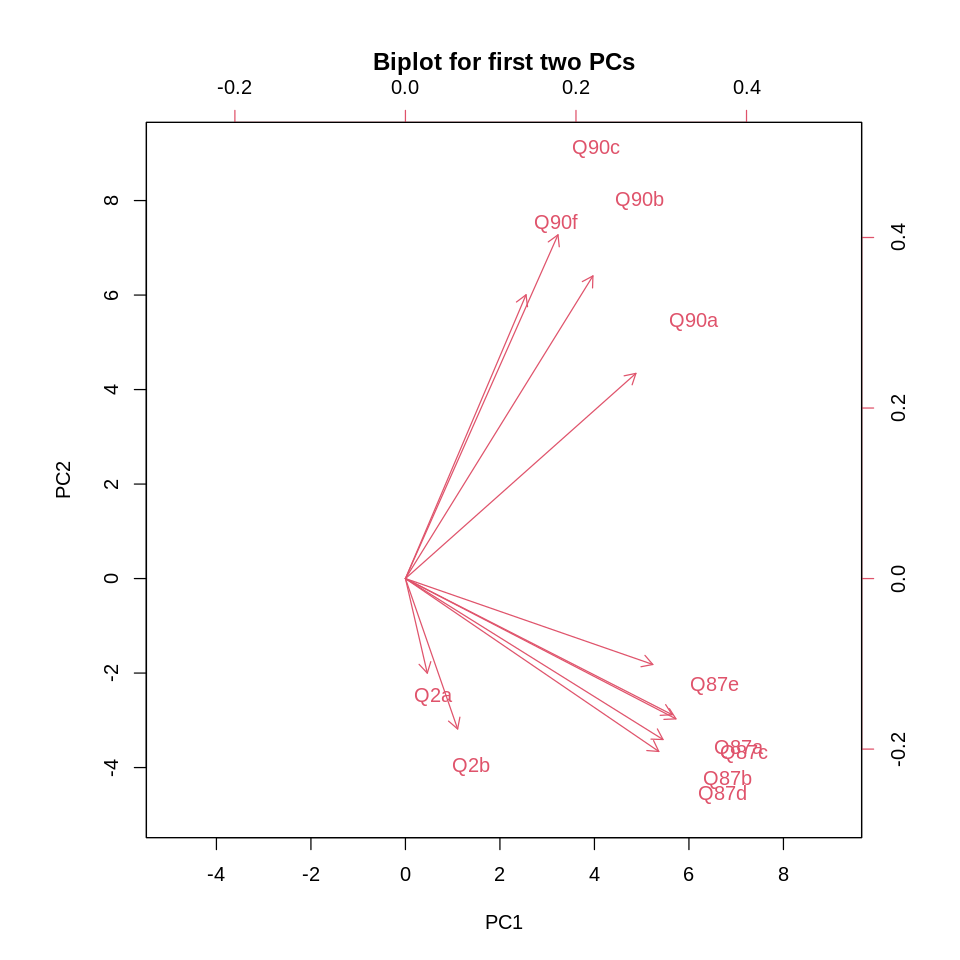

In [ ]:
# BIPLOT
# Depicting principal components' loadings
options(repr.plot.width=8, repr.plot.height=8)
stats::biplot(princomp, scale=0, main="Biplot for first two PCs", xlabs=rep("", nrow(ewcs)),)

In [ ]:
# Here we compute eigenvalues (variances of corresponding eigenvectors, or Principal Components vectors) and find their share using the sum of all eigenvalues
varexp <- princomp$sdev^2/sum(princomp$sdev^2)
varexp

[1] 0.40032007 0.12816296 0.09284248 0.08564363 0.07091291 0.05109605
 [7] 0.04621357 0.03864719 0.03225597 0.02901882 0.02488635

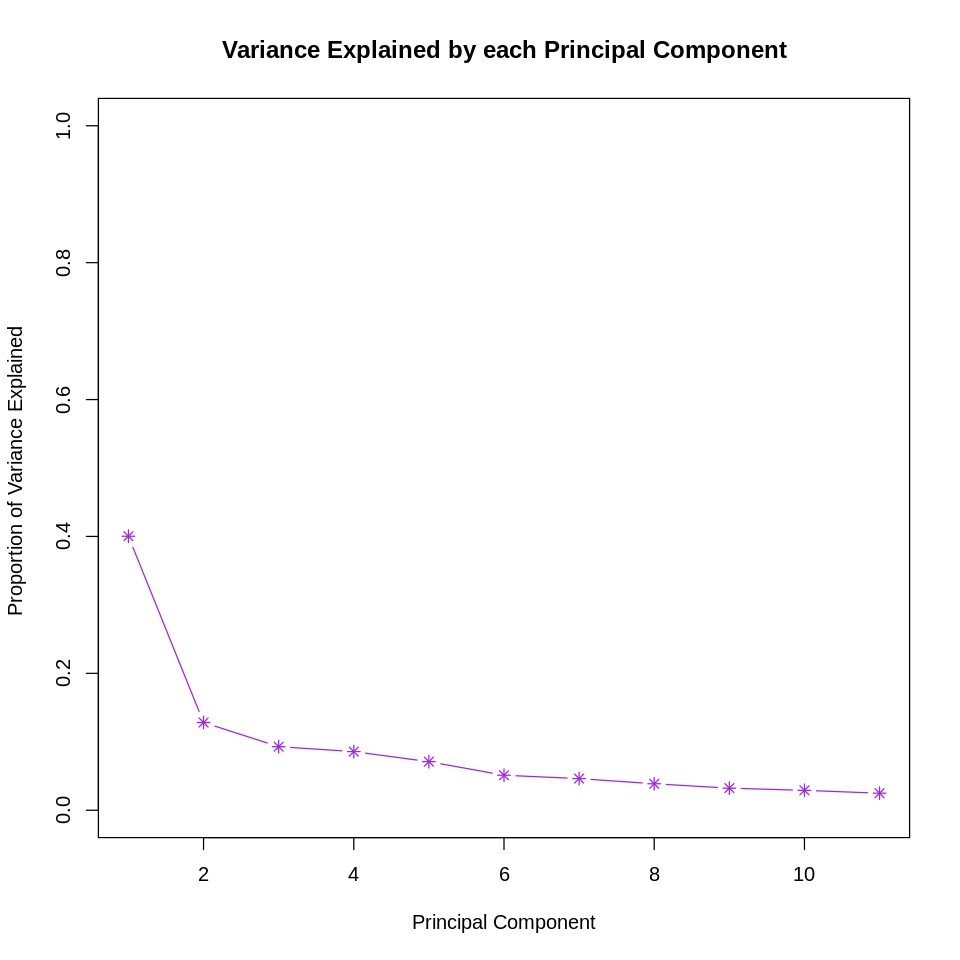

In [ ]:
# SCREE PLOT
options(repr.plot.width=8, repr.plot.height=8)
plot(varexp, xlab="Principal Component", ylab="Proportion of Variance Explained ", main="Variance Explained by each Principal Component", ylim=c(0,1), type="b", pch = 8, col="purple")

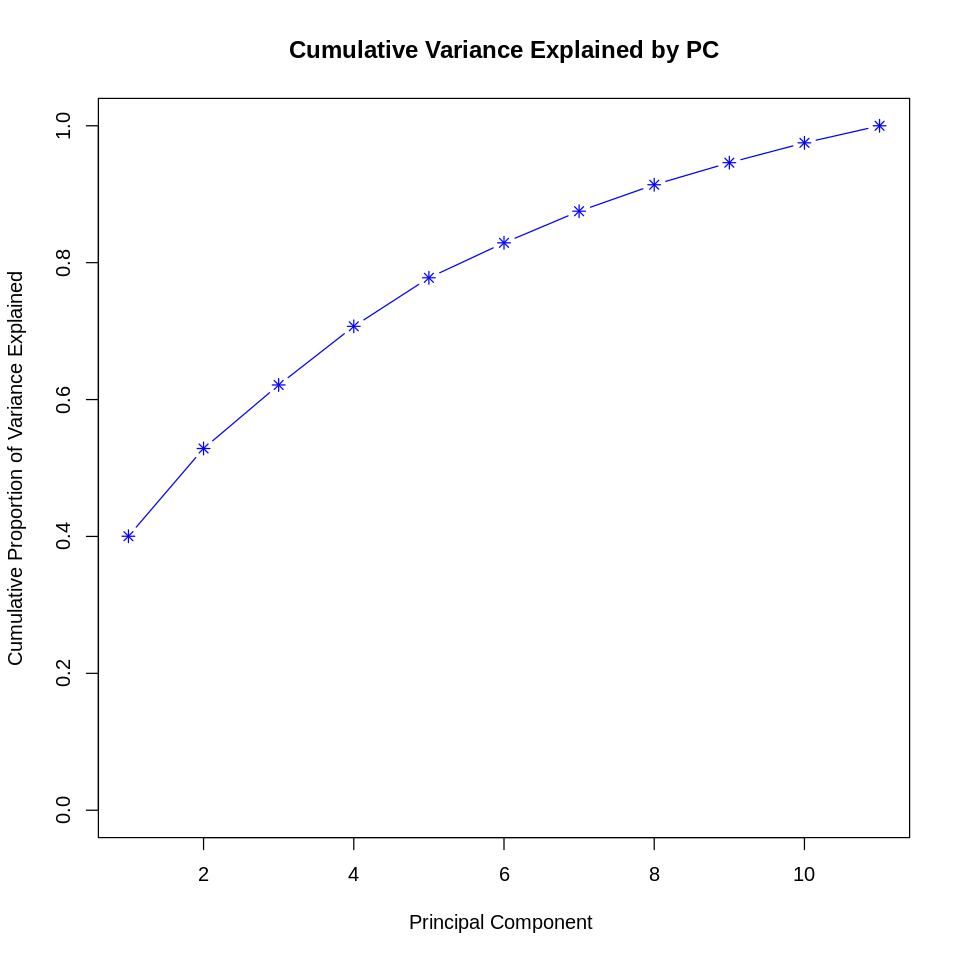

In [ ]:
# CUMULATIVE SCREE PLOT
plot(cumsum(varexp), xlab="Principal Component ", ylab=" Cumulative Proportion of Variance Explained ", main="Cumulative Variance Explained by PC", ylim=c(0,1), type="b", pch = 8, col="blue")

In [ ]:
# Finding optimal number of principal components
findElbowPoint(varexp)

[1] 11

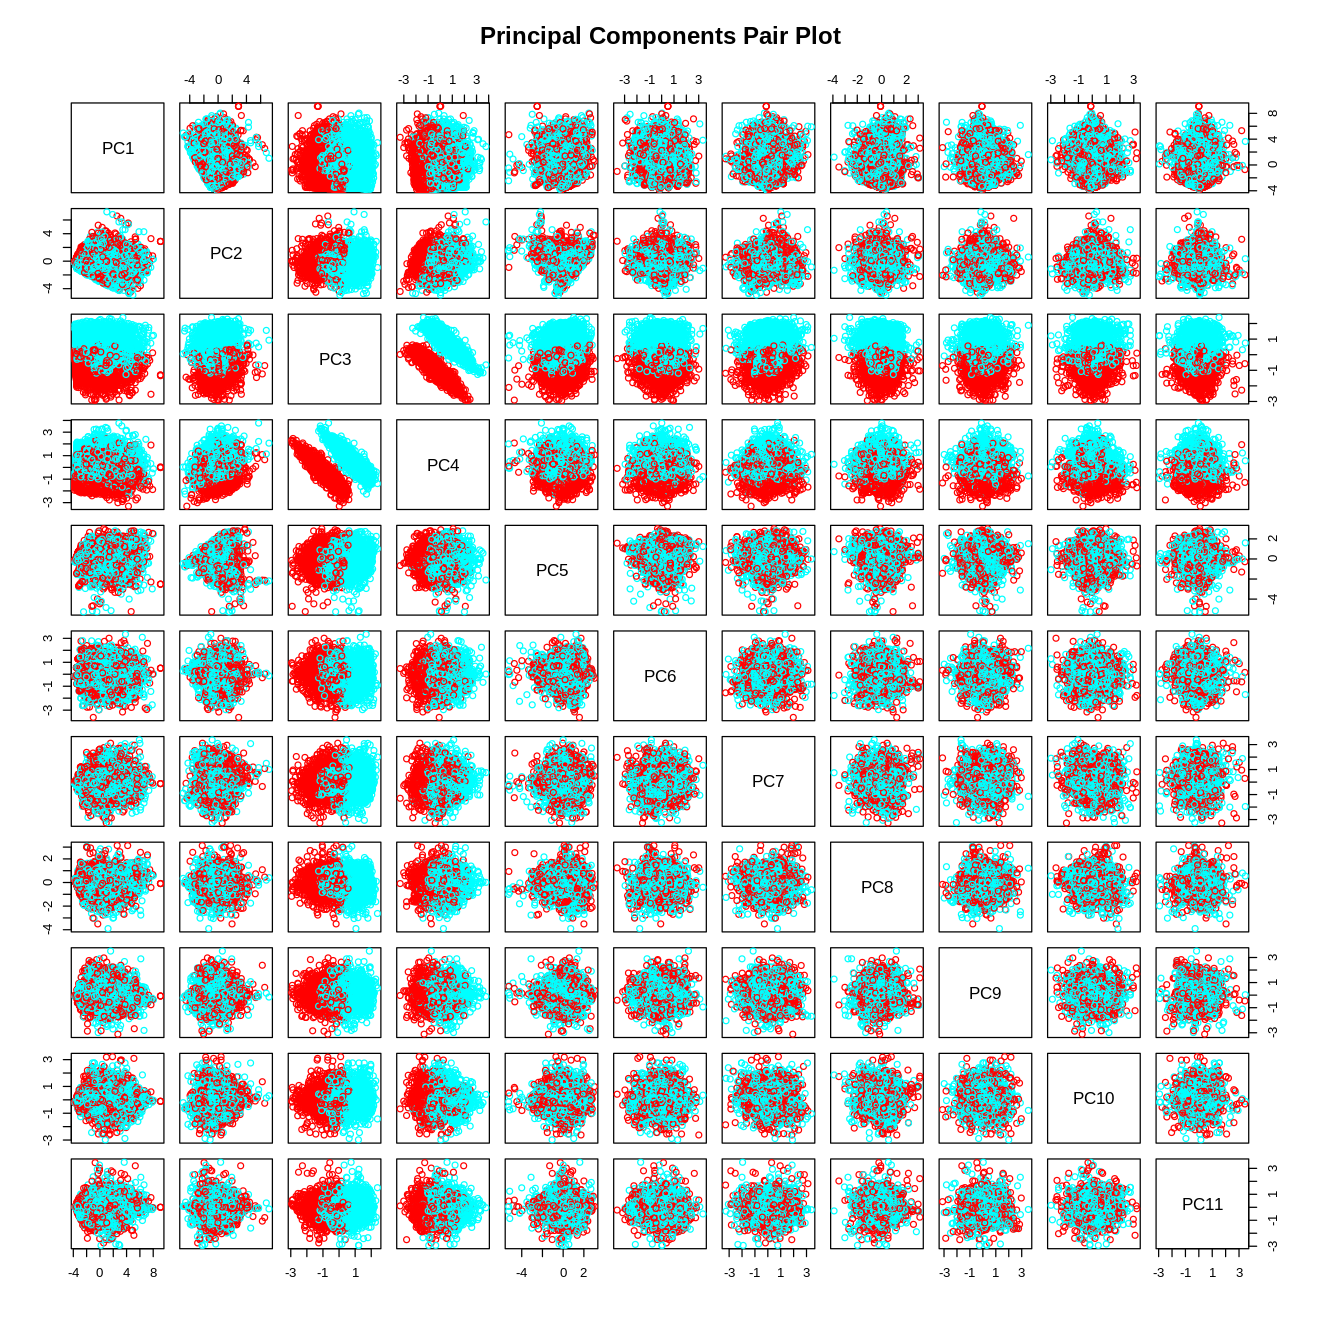

In [ ]:
options(repr.plot.width=11, repr.plot.height=11)
################### THIS PART OF CODE WAS TAKEN FROM "INTRODUCTION TO STATISTICAL LEARNING" (Hastie, Tibshirani).
Cols=function(vec){
  cols=rainbow(length(unique(vec)))
  return(cols[as.numeric(as.factor(vec))]) 
}
###################
pairs(princomp$x, col=Cols(ewcs$Q2a), main="Principal Components Pair Plot")

## Clustering

### K-means Clustering

In [ ]:
# Performing K-Means for different number of clusters
set.seed(15)
kkme2 <- kmeans(ewcs, 2, nstart=30)
kkme3 <- kmeans(ewcs, 3, nstart=30)
kkme4 <- kmeans(ewcs, 4, nstart=30)
kkme5 <- kmeans(ewcs, 5, iter.max=15, nstart=30)

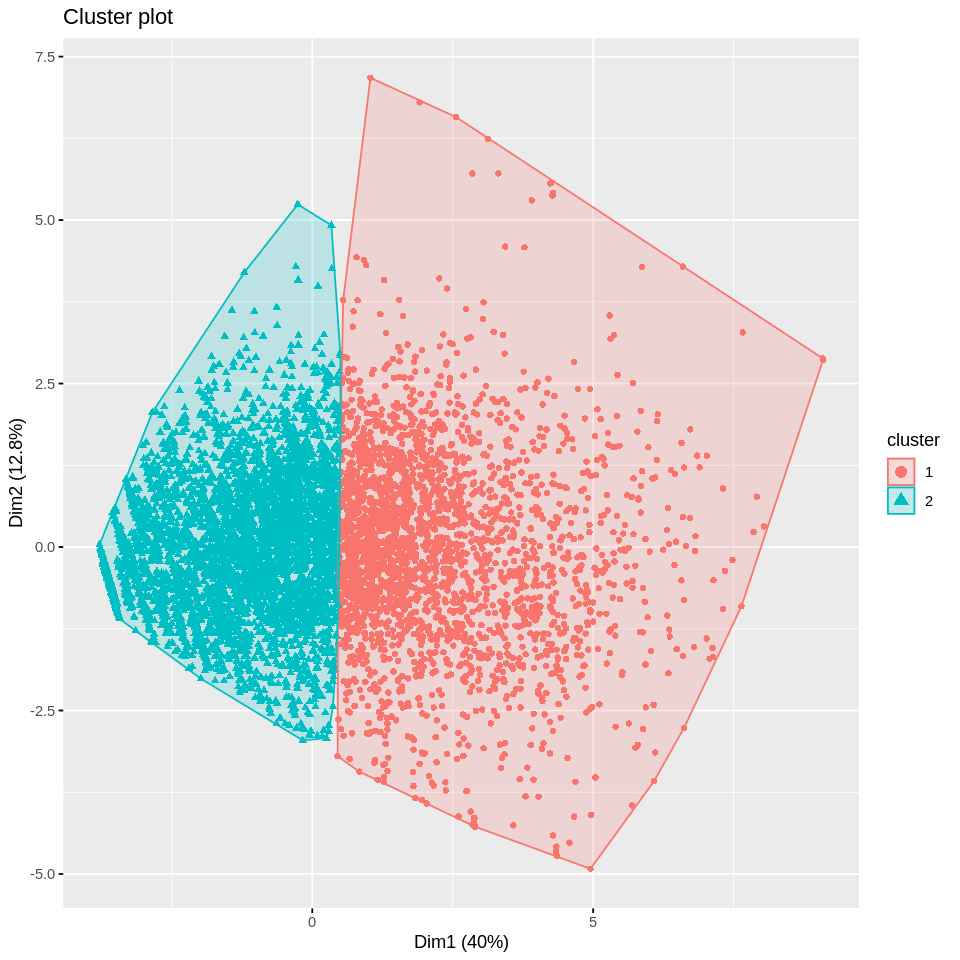

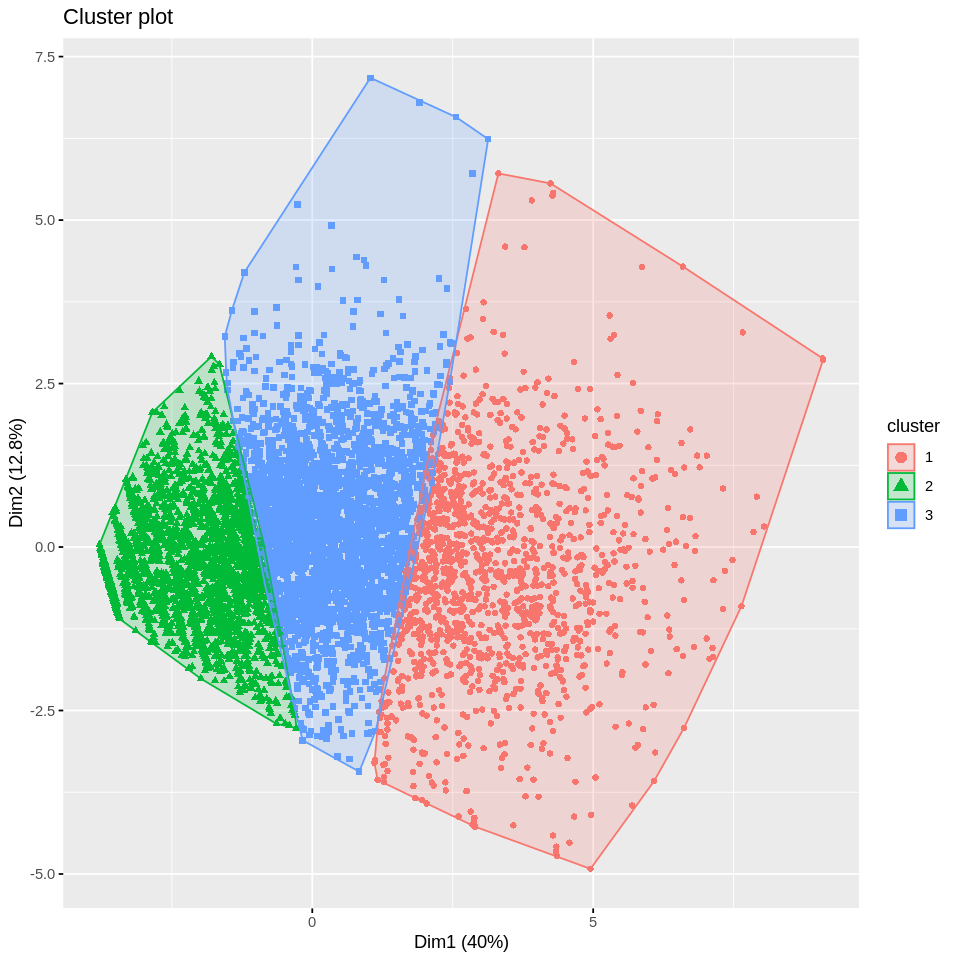

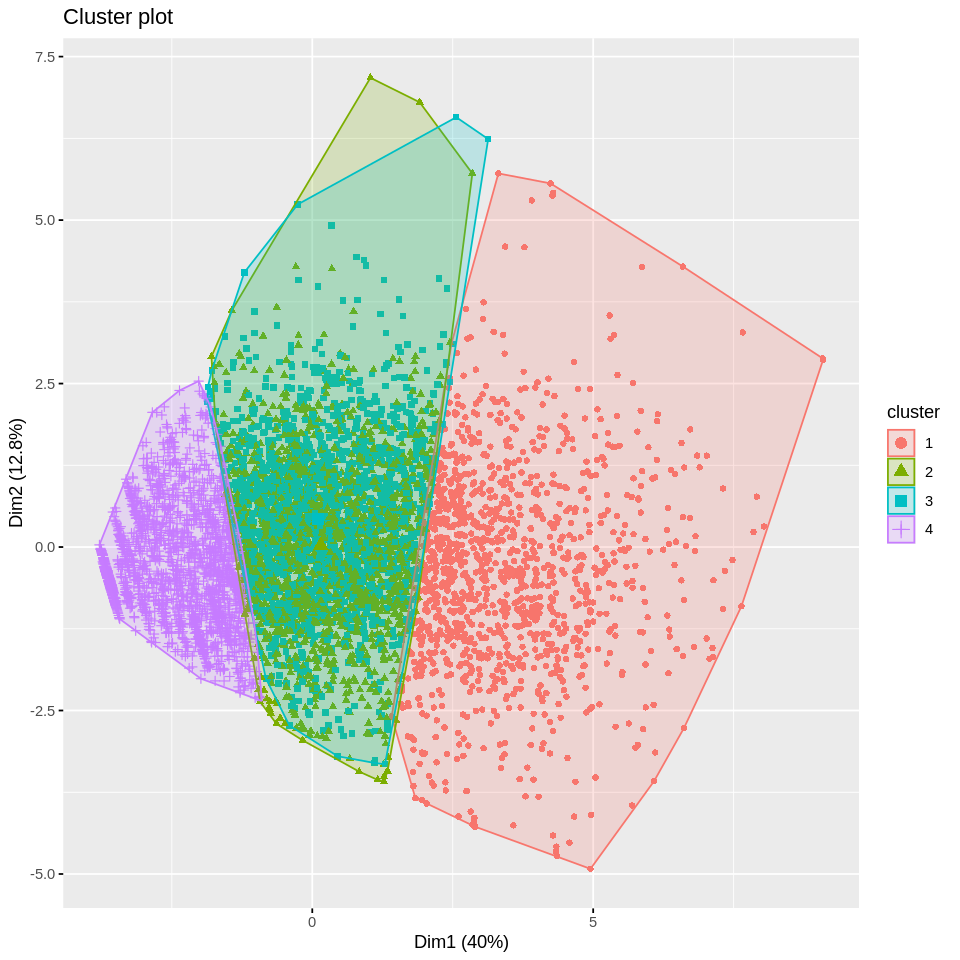

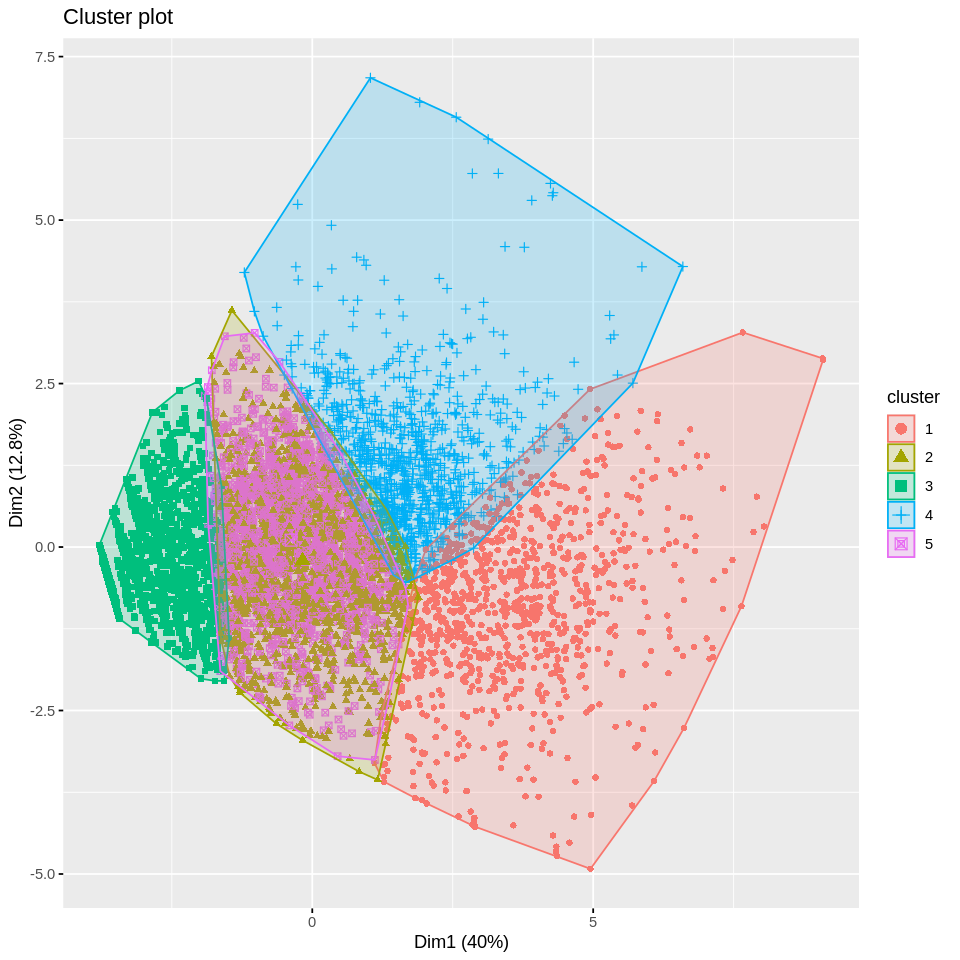

In [ ]:
# Depicting all the K-Means
set.seed(15)
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2,2))
fviz_cluster(kkme2, geom = "point", data = ewcs)
fviz_cluster(kkme3, geom = "point", data = ewcs)
fviz_cluster(kkme4, geom = "point", data = ewcs)
fviz_cluster(kkme5, geom = "point", data = ewcs)

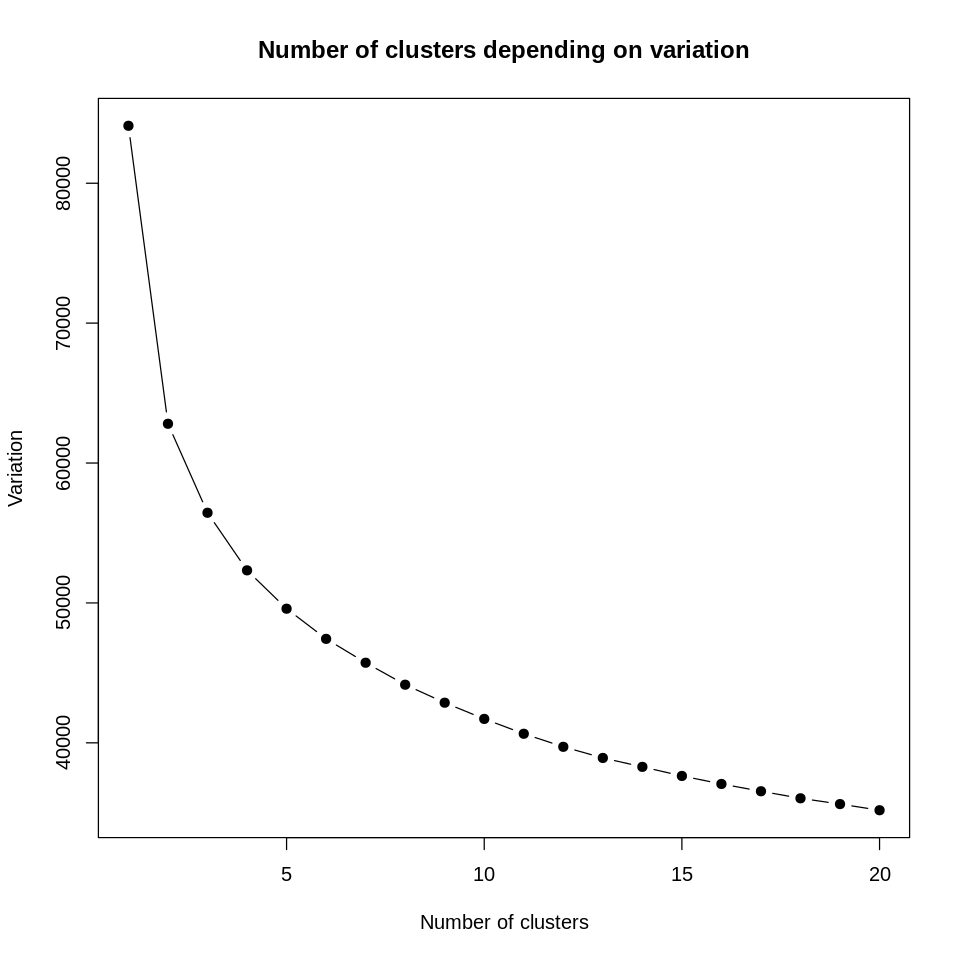

In [ ]:
# Determining optimal number of clusters applying Elbow method
options(repr.plot.width=8, repr.plot.height=8)
set.seed(15)
variat <- list()
for (i in 1:20) {
  variat[[i]] <- kmeans(ewcs, i, iter.max=20, nstart=25)$tot.withinss
}
plot(1:20, variat, type="b", pch = 19, xlab="Number of clusters", ylab="Variation", main="Number of clusters depending on variation")

In [ ]:
# Distribution of clusters in four-cluster division
table(kkme4$cluster)


   1    2    3    4 
1229 2093 2300 2025 

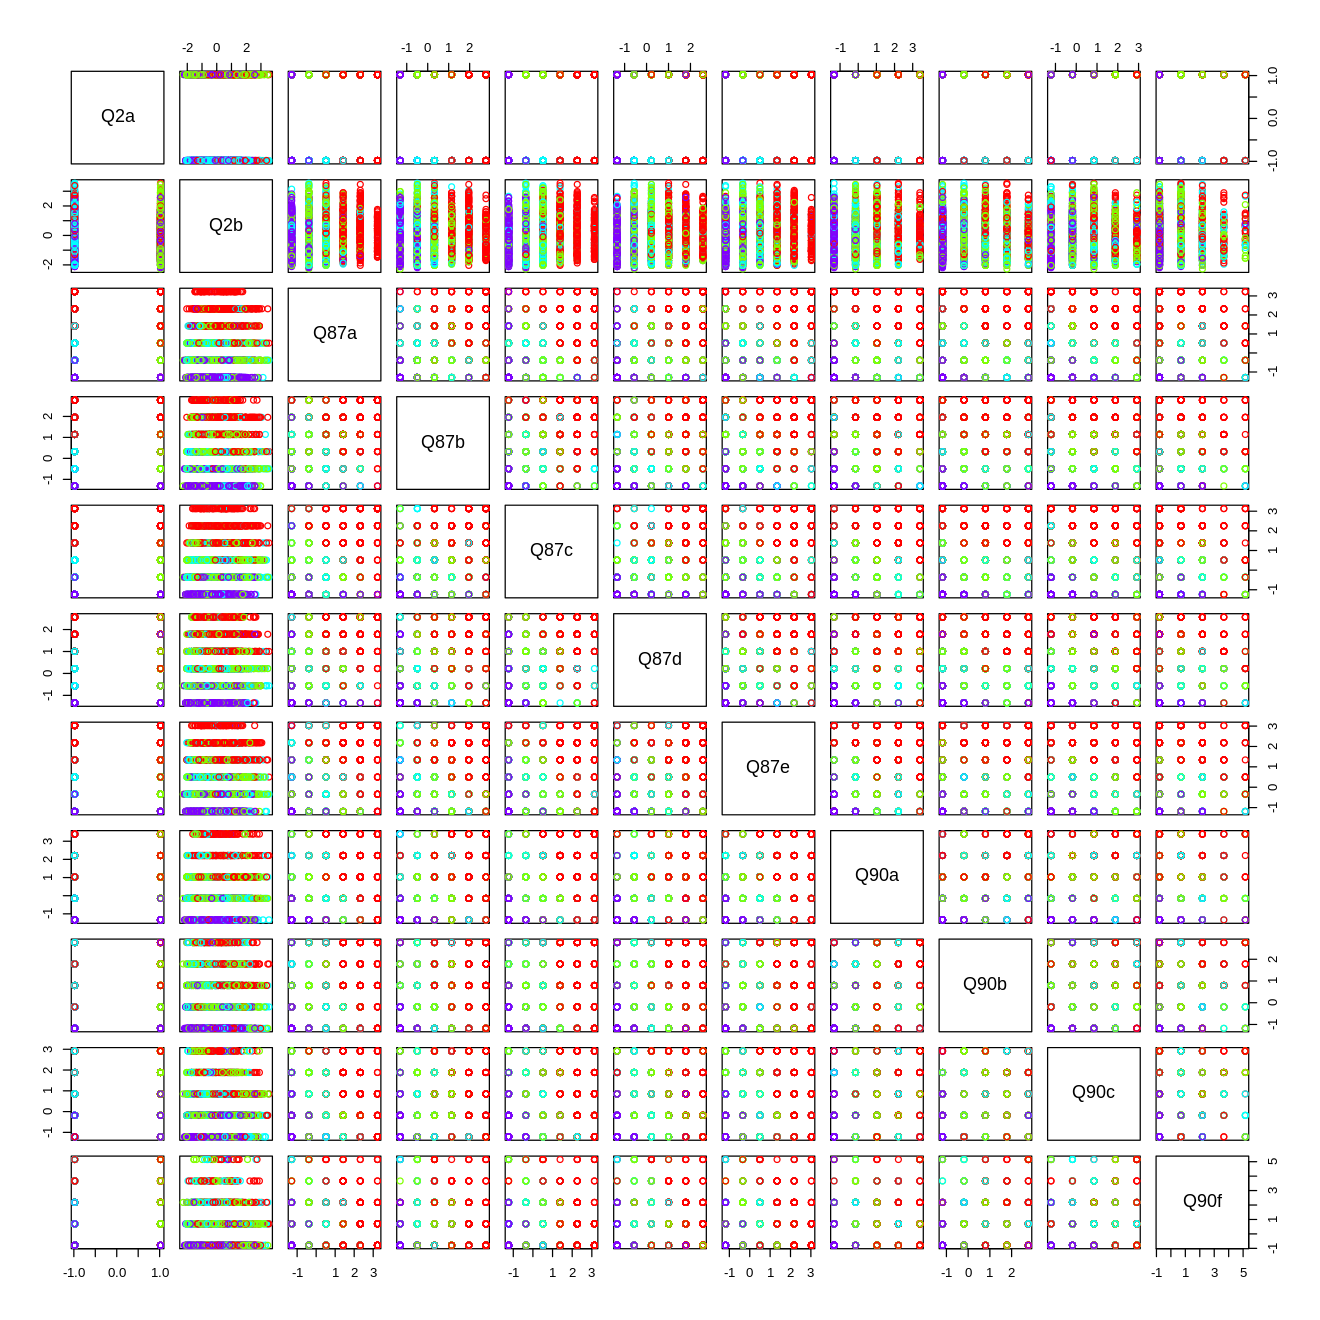

In [ ]:
# PAIRPLOT
options(repr.plot.width=11, repr.plot.height=11)
################### THIS PART OF CODE WAS TAKEN FROM "INTRODUCTION TO STATISTICAL LEARNING" (Hastie, Tibshirani).
Cols=function(vec){
  cols=rainbow(length(unique(vec)))
  return(cols[as.numeric(as.factor(vec))]) 
}
################### 

pairs(ewcs, col=Cols(kkme4$cluster))

### Hierarchical Clustering

In [ ]:
# Gain Euclidean distances
dists <- dist(ewcs)

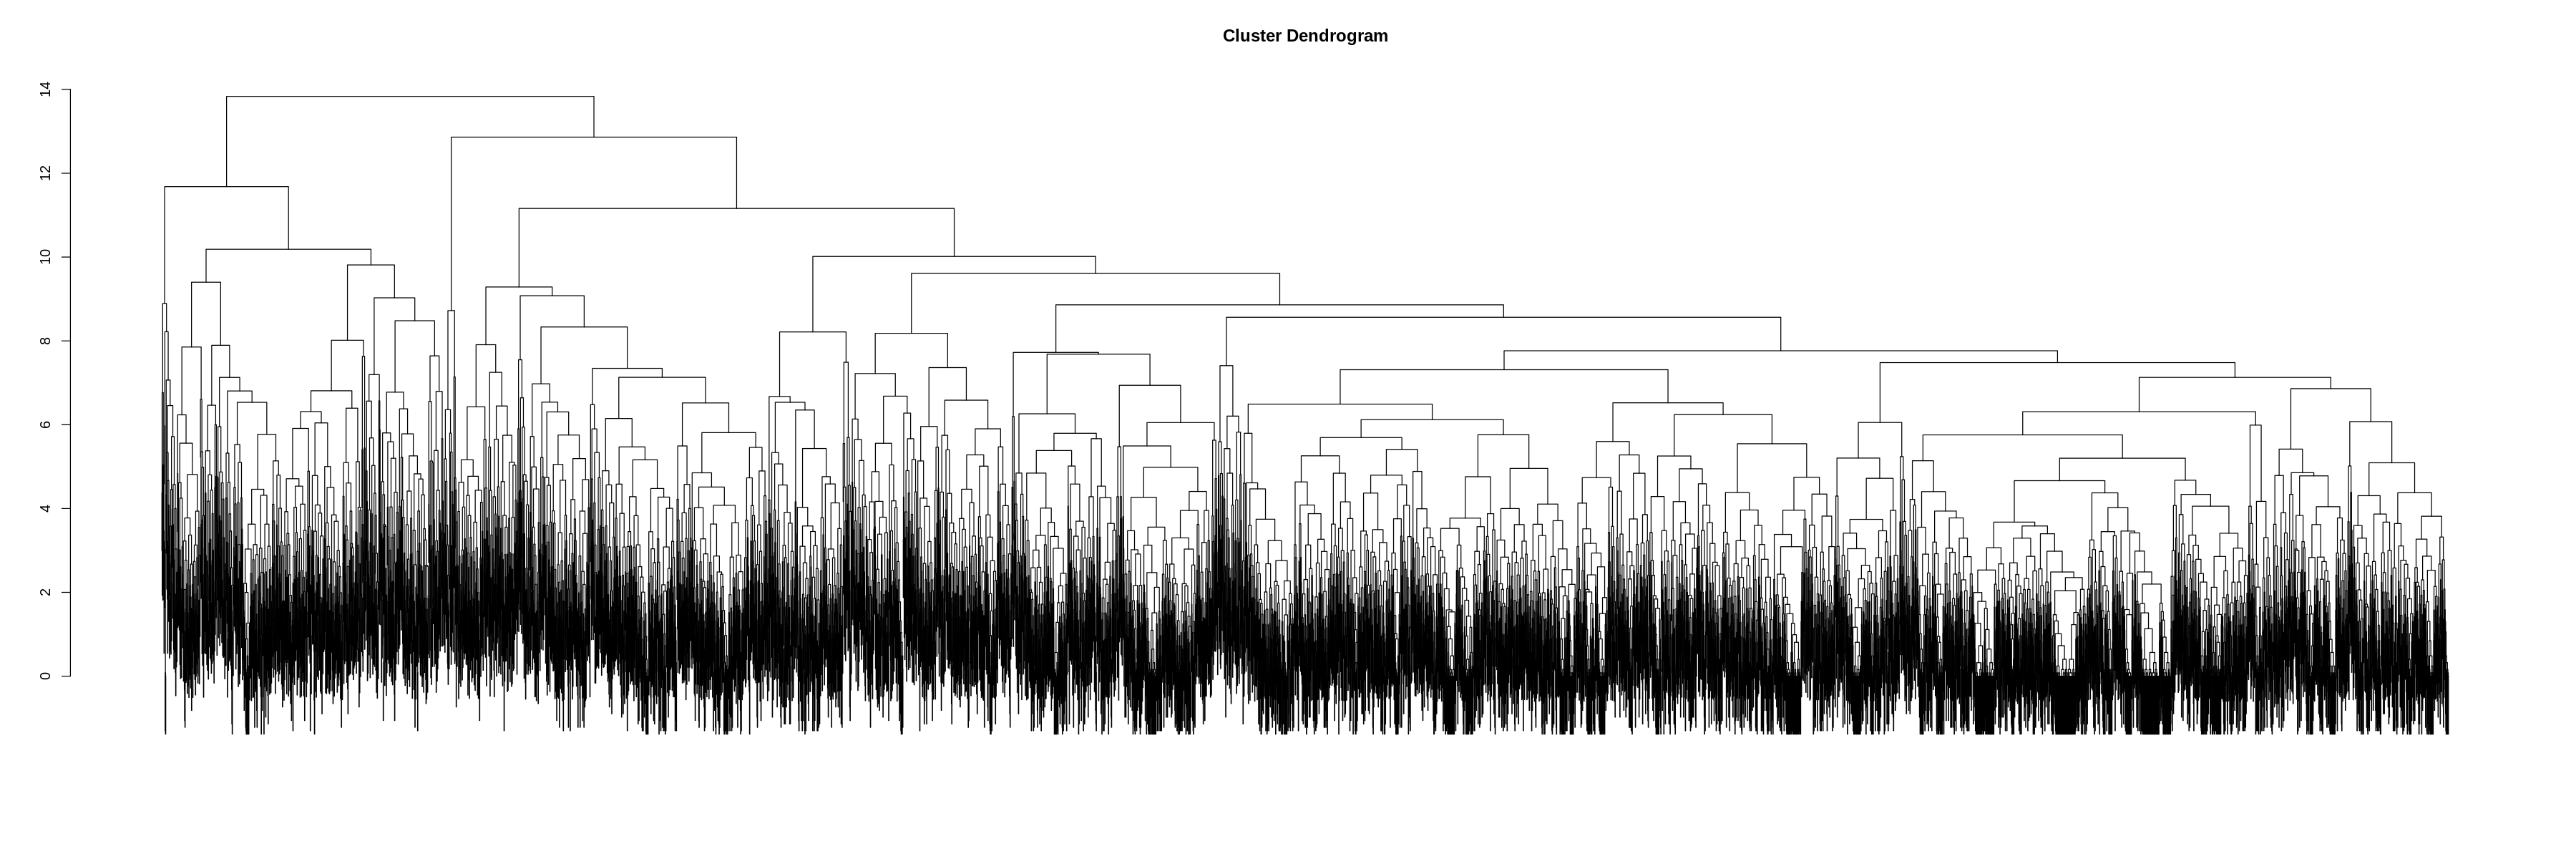

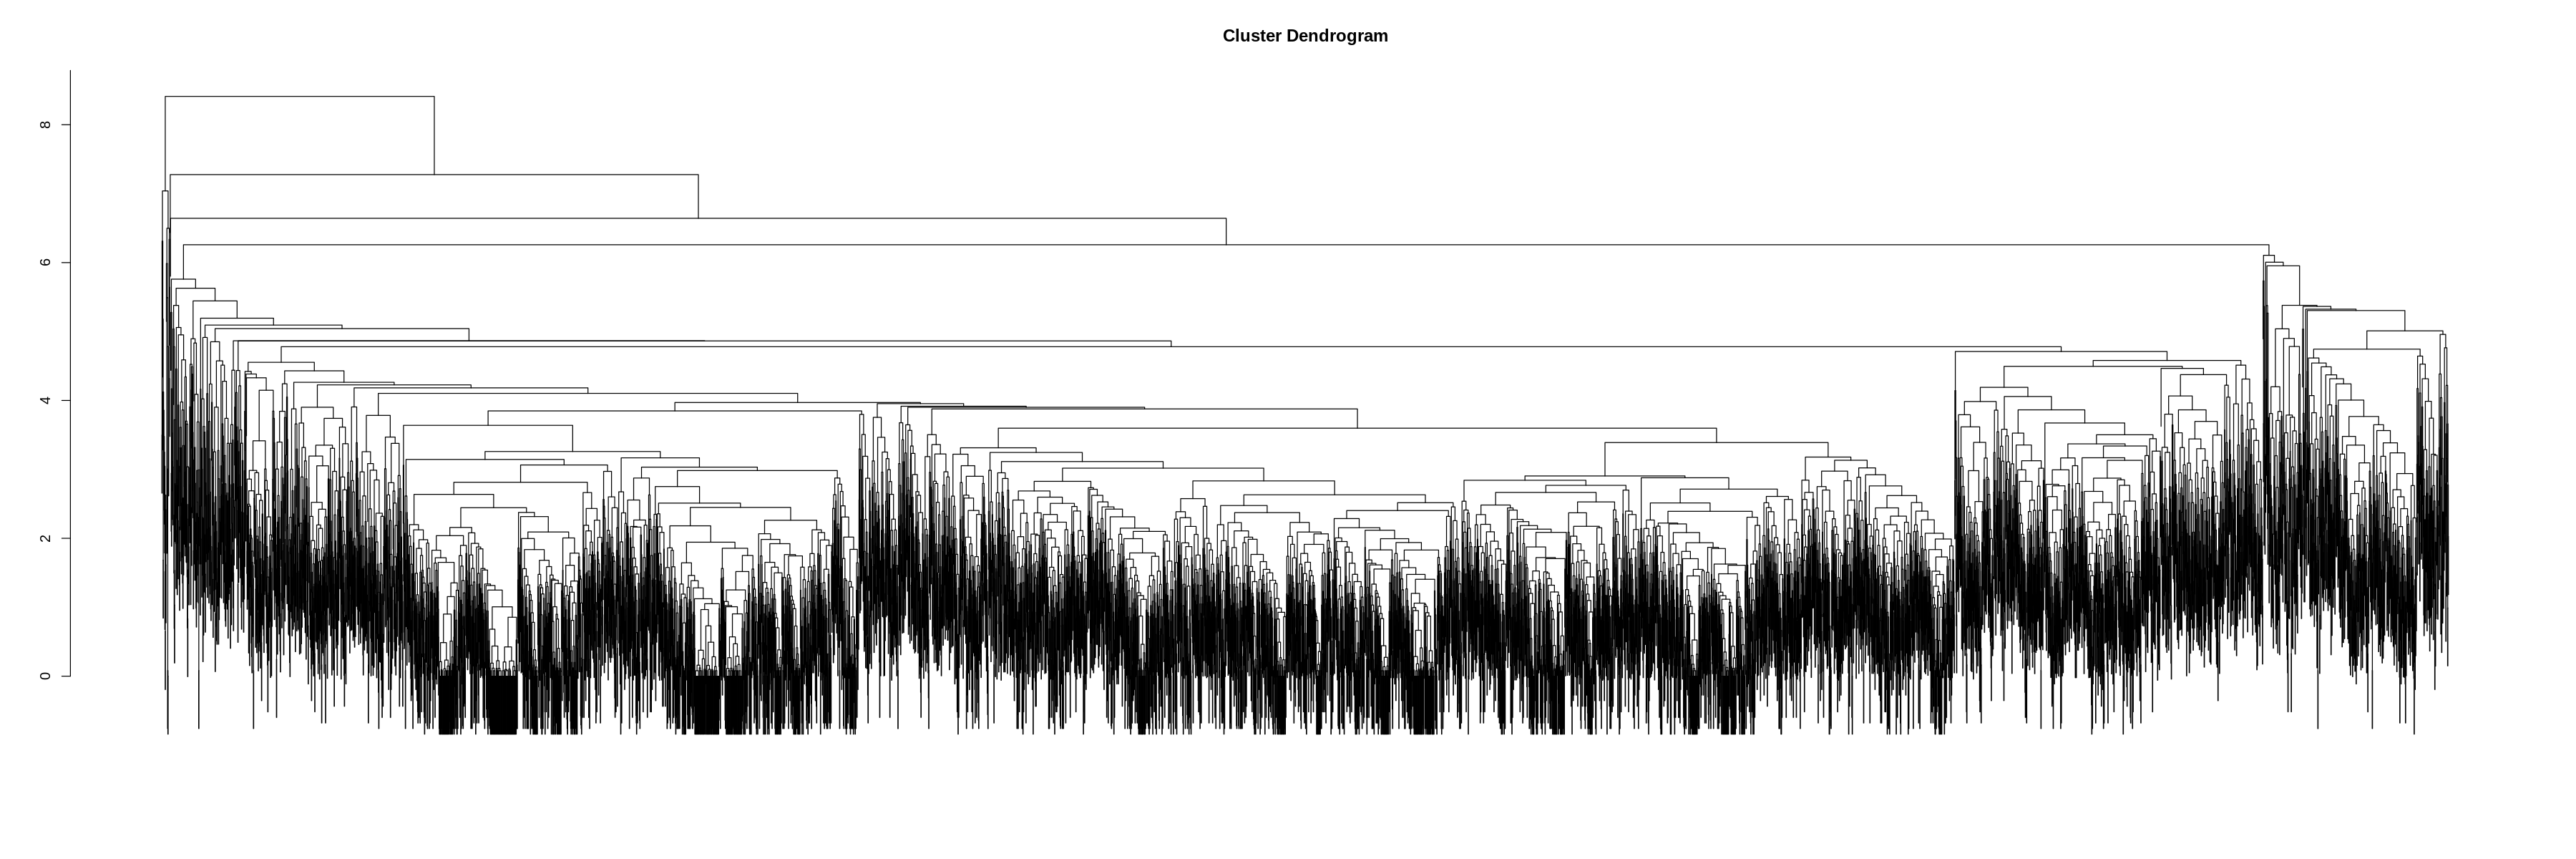

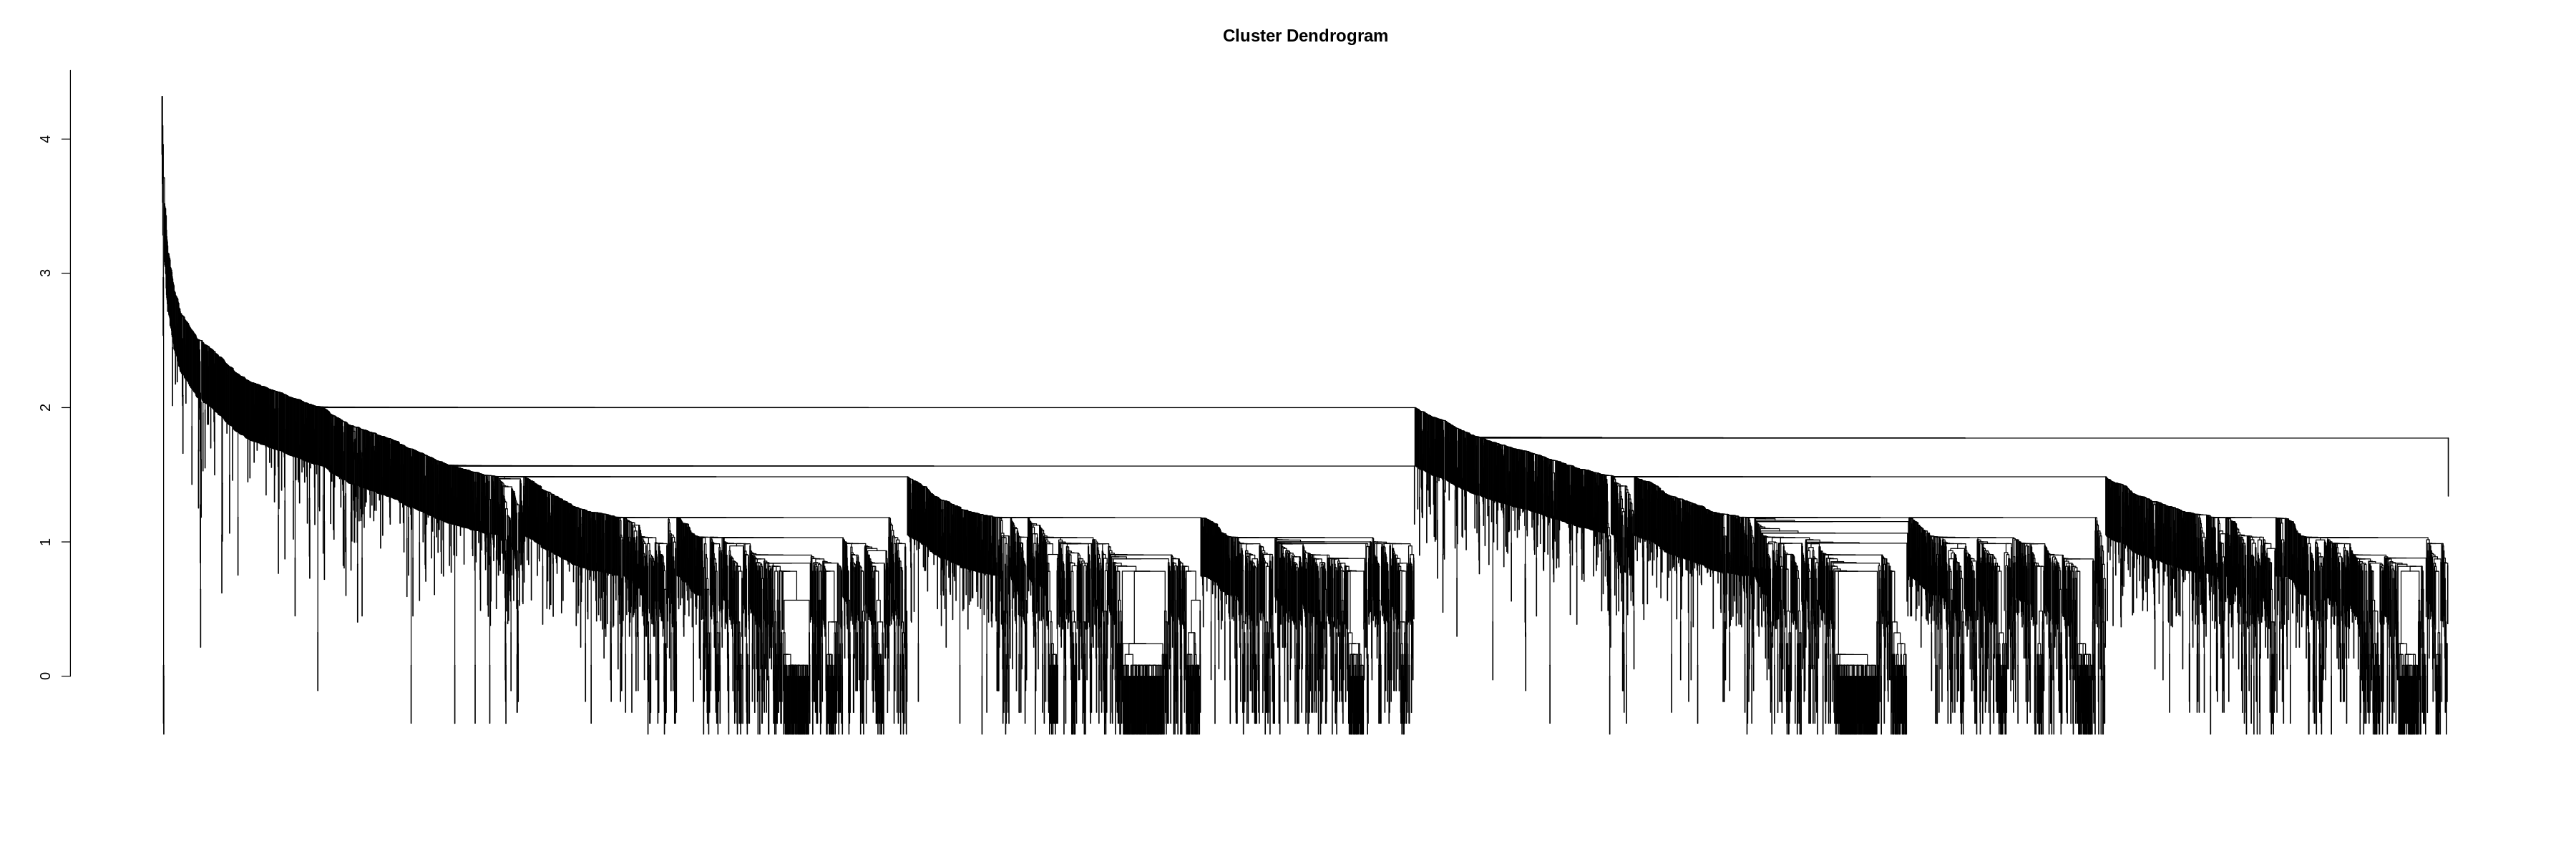

In [ ]:
# Depict hierarchical plots for different linkages
set.seed(15)
options(repr.plot.width=30, repr.plot.height=10)
for (i in c("complete","average","single")) {
  hiers <- hclust(dists, method = i)
  plot(hiers, xlab="", sub="",ylab="", labels=F)  
}

In [ ]:
# Distribution of variables for different number of clusters and linkages
table(cutree(hclust(dists, method = "complete"),2))
table(cutree(hclust(dists, method = "average"),2))
table(cutree(hclust(dists, method = "single"),2))

table(cutree(hclust(dists, method = "complete"),3))
table(cutree(hclust(dists, method = "average"),3))
table(cutree(hclust(dists, method = "single"),3))

table(cutree(hclust(dists, method = "complete"),4))
table(cutree(hclust(dists, method = "average"),4))
table(cutree(hclust(dists, method = "single"),4))


   1    2 
6703  944 


   1    2 
7619   28 


   1    2 
7646    1 


   1    2    3 
6658  944   45 


   1    2    3 
7618   28    1 


   1    2    3 
7645    1    1 


   1    2    3    4 
6658  892   52   45 


   1    2    3    4 
7618   15   13    1 


   1    2    3    4 
7644    1    1    1 

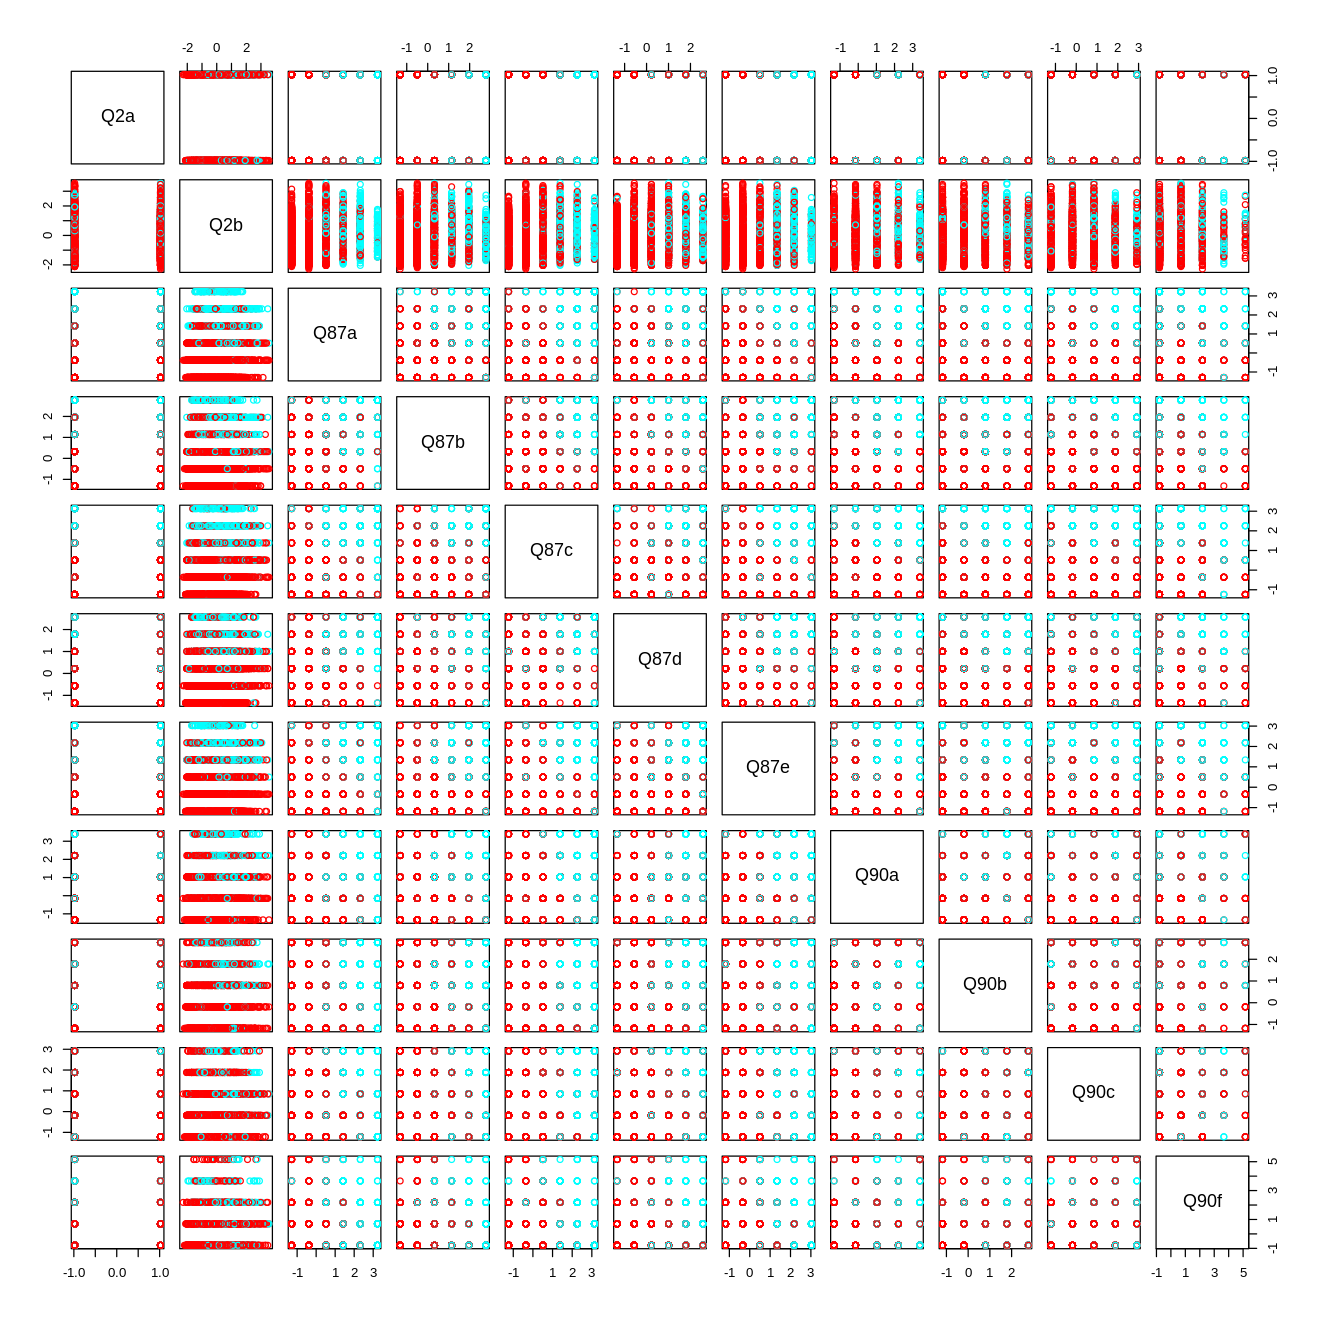

In [ ]:
# PAIRPLOT
options(repr.plot.width=11, repr.plot.height=11)
################### THIS PART OF CODE WAS TAKEN FROM "INTRODUCTION TO STATISTICAL LEARNING" (Hastie, Tibshirani).
Cols=function(vec){
  cols=rainbow(length(unique(vec)))
  return(cols[as.numeric(as.factor(vec))]) 
}
################### 
hierar <- hclust(dists, method = "complete")
cutting <- cutree(hierar,2)
pairs(ewcs, col=Cols(cutting))

# PART 2: REGRESSION ANALYSIS

In [ ]:
school1=read.table("student-mat.csv",sep=";",header=TRUE)
school2=read.table("student-por.csv",sep=";",header=TRUE)

## Exploratory Data Analysis (EDA)

### Initial Analysis

In [ ]:
# Investigate structure of data
dim(school1)
dim(school2)

[1] 395  33

[1] 649  33

In [ ]:
# Investigate structure of data
str(school1)

'data.frame':	395 obs. of  33 variables:
 $ school    : chr  "GP" "GP" "GP" "GP" ...
 $ sex       : chr  "F" "F" "F" "F" ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : chr  "U" "U" "U" "U" ...
 $ famsize   : chr  "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus   : chr  "A" "T" "T" "T" ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : chr  "at_home" "at_home" "at_home" "health" ...
 $ Fjob      : chr  "teacher" "other" "other" "services" ...
 $ reason    : chr  "course" "course" "other" "home" ...
 $ guardian  : chr  "mother" "father" "mother" "mother" ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : chr  "yes" "no" "yes" "no" ...
 $ famsup    : chr  "no" "yes" "no" "yes" ...
 $ paid      : chr  "no" "no" "yes" "yes" ...
 $ activities: chr  "no" "no" "no" "yes" ...
 $ nursery   : chr  "yes" "no" "yes" "yes" ...
 $

In [ ]:
# Investigate structure of data
str(school2)

'data.frame':	649 obs. of  33 variables:
 $ school    : chr  "GP" "GP" "GP" "GP" ...
 $ sex       : chr  "F" "F" "F" "F" ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : chr  "U" "U" "U" "U" ...
 $ famsize   : chr  "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus   : chr  "A" "T" "T" "T" ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : chr  "at_home" "at_home" "at_home" "health" ...
 $ Fjob      : chr  "teacher" "other" "other" "services" ...
 $ reason    : chr  "course" "course" "other" "home" ...
 $ guardian  : chr  "mother" "father" "mother" "mother" ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ schoolsup : chr  "yes" "no" "yes" "no" ...
 $ famsup    : chr  "no" "yes" "no" "yes" ...
 $ paid      : chr  "no" "no" "no" "no" ...
 $ activities: chr  "no" "no" "no" "yes" ...
 $ nursery   : chr  "yes" "no" "yes" "yes" ...
 $ h

### Checking for absent observations

In [ ]:
# The following code I took from StackOverflow: https://stackoverflow.com/questions/24027605/determine-the-number-of-na-values-in-a-column
unlist(lapply(school1, function(x) {length(which(is.na(x)))}))

school        sex        age    address    famsize    Pstatus       Medu 
         0          0          0          0          0          0          0 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
         0          0          0          0          0          0          0 
  failures  schoolsup     famsup       paid activities    nursery     higher 
         0          0          0          0          0          0          0 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
         0          0          0          0          0          0          0 
    health   absences         G1         G2         G3 
         0          0          0          0          0

In [ ]:
# The following code I took from StackOverflow: https://stackoverflow.com/questions/24027605/determine-the-number-of-na-values-in-a-column
unlist(lapply(school2, function(x) {length(which(is.na(x)))}))

school        sex        age    address    famsize    Pstatus       Medu 
         0          0          0          0          0          0          0 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
         0          0          0          0          0          0          0 
  failures  schoolsup     famsup       paid activities    nursery     higher 
         0          0          0          0          0          0          0 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
         0          0          0          0          0          0          0 
    health   absences         G1         G2         G3 
         0          0          0          0          0

### Checking for the presence of outliers

Using school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic as id variables

Using school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic as id variables



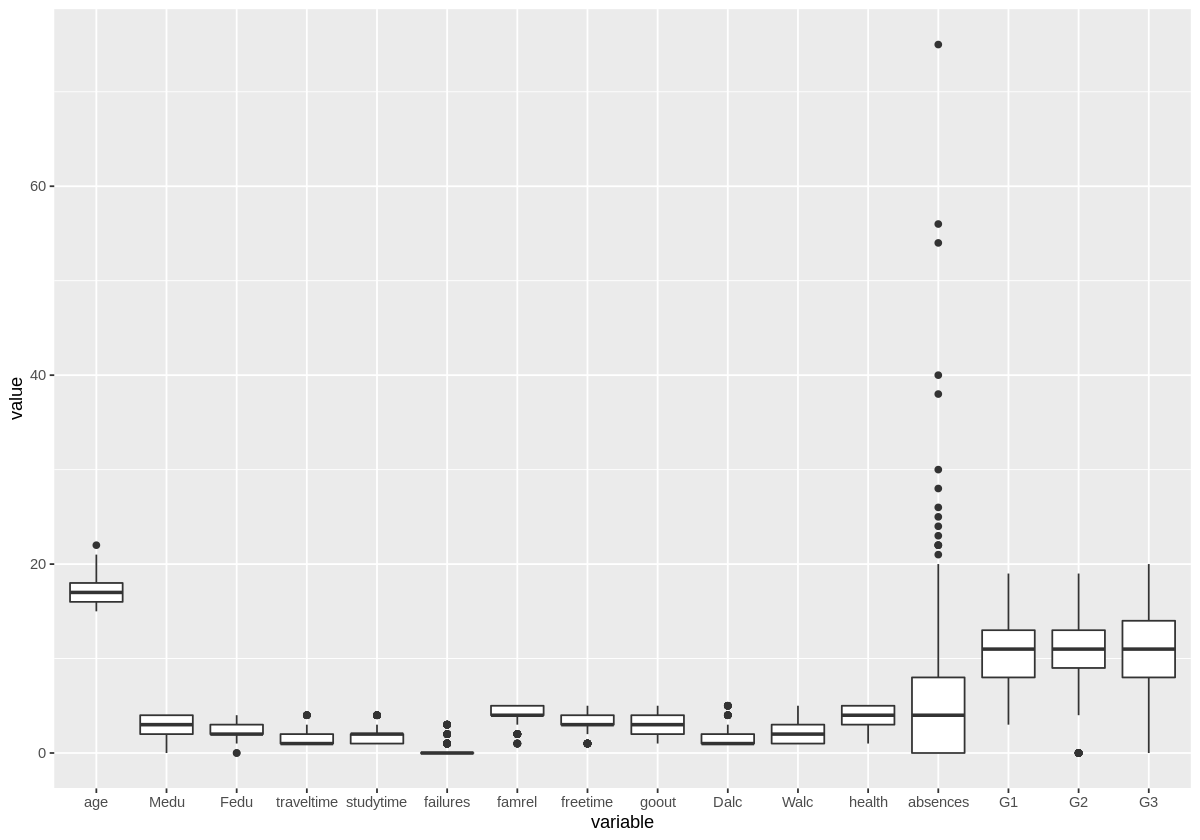

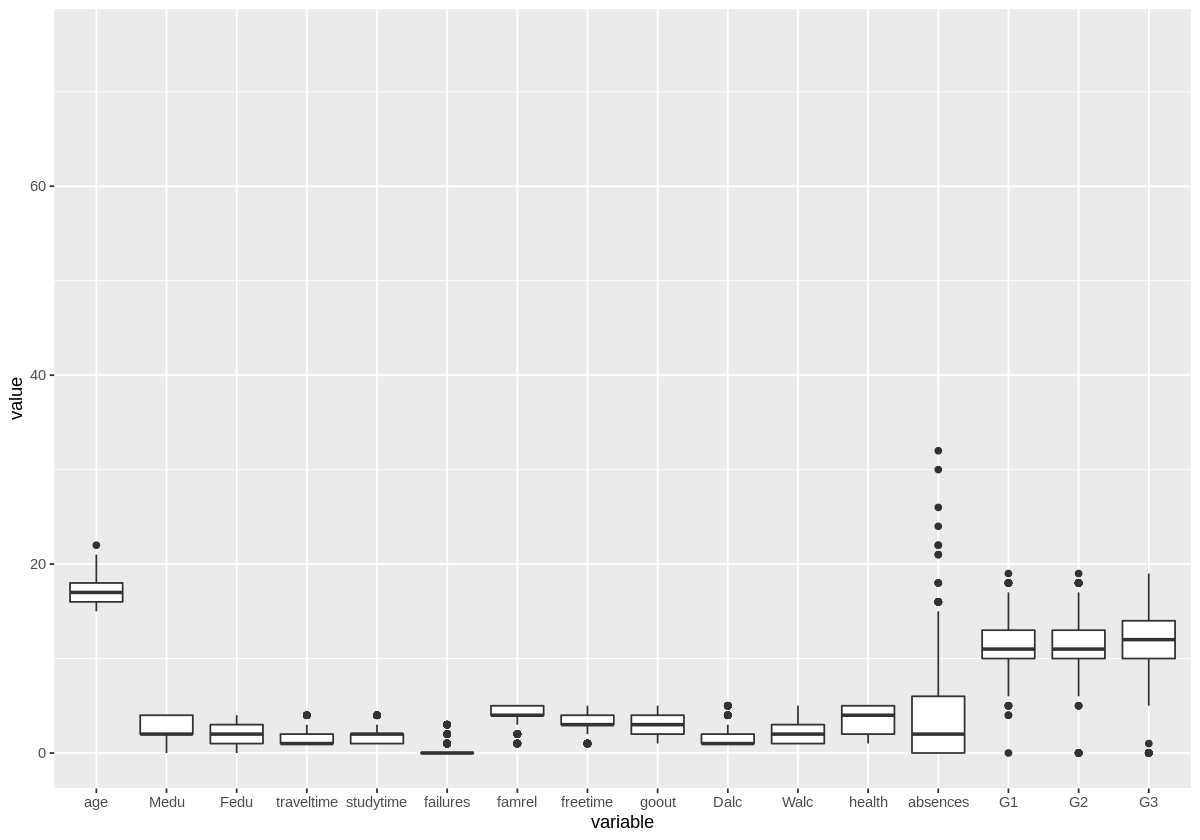

In [ ]:
# Depict Boxplots
options(repr.plot.width=10, repr.plot.height=7)
#par(mfrow=c(1,2))
school1melt <- melt(school1) 
boxes1 <- ggplot(data = school1melt, aes(x=variable, y=value)) + geom_boxplot() 

school2melt <- melt(school2) 
boxes2 <- ggplot(data = school2melt, aes(x=variable, y=value)) + geom_boxplot() + ylim(0, 75)

boxes1
boxes2

In [ ]:
# Are datasets similar? Medu should be similar to the same student in both courses
school1$Medu[1:300] - school2$Medu[1:300]
# A lot of non-zero values prove that students in two groups are different.

[1]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [51]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [76]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[101]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[126]  0  0  0 -2  2  0 -1  0  2  1  1  1  1 -2  0  1  1  1 -2  1 -2  2 -3  3 -2
[151] -2 -2  1 -1  3  0  0 -1 -1  2  1 -1 -1  0 -1  0 -1  0  0  3  2 -1  1  0  1
[176]  1  1  2  3  1  2 -1  0 -1  0  2 -3  1  0 -3  0 -2 -3 -1 -2 -1  2  0  1  1
[201]  3  0 -2  1  0  2  2  1 -1  2 -1  1 -2 -2  0  1  3  1  0 -1 -1 -3  1 -2  1
[226] -1  1  0 -2 -1  0 -1  2  2 -1  2  0  0 -2 -1  1  2  2  2 -2  0 -2 -1  2 -3
[251]  1  1 -2  0  0 -2  2  0 -1  1  3  2  2  1  0  2 -1  0  0 -2 -1 -2  0 -2  1
[276]  0  1  3  2  1  1  3 -2 -2  0 -1  0  0  0  0  2  2 -2  2  1 -1  2  2  2  2

### Solving the problem of outliers

In [ ]:
# Check only those variables that show outliers on the boxplots 
# SCHOOL 1 OUTLIERS
paste("Number of outliers for each variable of school 1 is ", length(boxplot.stats(school1$age)$out),length(boxplot.stats(school1$Fedu)$out),length(boxplot.stats(school1$traveltime)$out),length(boxplot.stats(school1$studytime)$out),
length(boxplot.stats(school1$failures)$out),length(boxplot.stats(school1$famrel)$out),length(boxplot.stats(school1$freetime)$out),length(boxplot.stats(school1$Dalc)$out),length(boxplot.stats(school1$absences)$out),sep=" ")

# SCHOOL 2 OUTLIERS
paste("Number of outliers for each variable of school 2 is ", length(boxplot.stats(school2$age)$out),length(boxplot.stats(school2$traveltime)$out),length(boxplot.stats(school2$studytime)$out),length(boxplot.stats(school2$failures)$out),
length(boxplot.stats(school2$famrel)$out),length(boxplot.stats(school2$freetime)$out),length(boxplot.stats(school2$Dalc)$out),length(boxplot.stats(school2$absences)$out),sep=" ")

[1] "Number of outliers for each variable of school 1 is  1 2 8 27 83 26 19 18 15"

[1] "Number of outliers for each variable of school 2 is  1 16 35 100 51 45 34 21"

In [ ]:
# Before log transforming some of the regressors we should eliminate all negative and zero values of regressors.
nrow(school1[school1$absences==0,])
nrow(school2[school2$absences==0,])
# Out of all regressors that need to be transformed "absences" has a lot of zeroes, so we add one to all the zeroes:
school1$absences <- ifelse(school1$absences==0, 1, school1$absences)
school2$absences <- ifelse(school2$absences==0, 1, school2$absences)

[1] 115

[1] 244

In [ ]:
# Regressor "failures" is a problematic one. It has a lot of zero values, thus creating an enormous number of outliers.
# At the same time, this regressor may not be log-transformed as we cannot take logarithm of zeroes. Simultaneously,
# we cannot add one to all the zeroes (as we did with "absence") as "failures" regressor is an ordinal categorical one,
# and adding ones to all zeroes will lead to distorted results. So, eliminate regressor "failures".

#school1$failures <- NULL
#school2$failures <- NULL

No id variables; using all as measure variables

No id variables; using all as measure variables



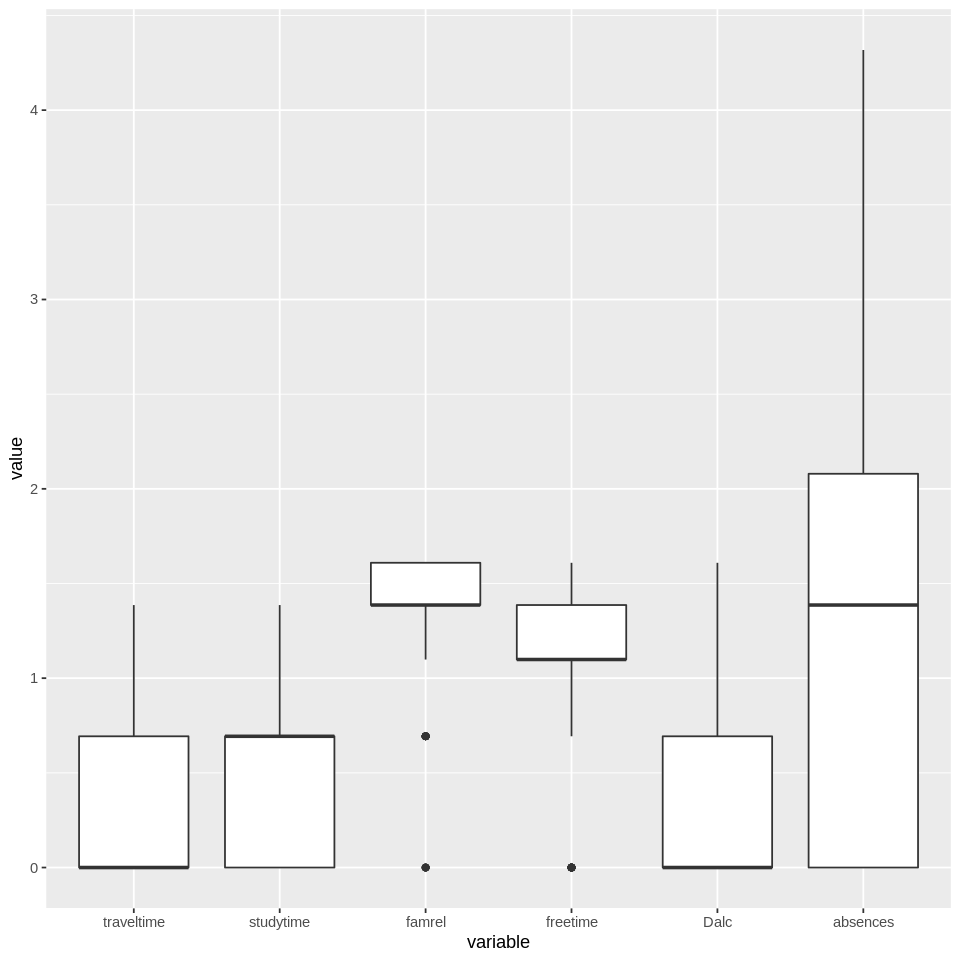

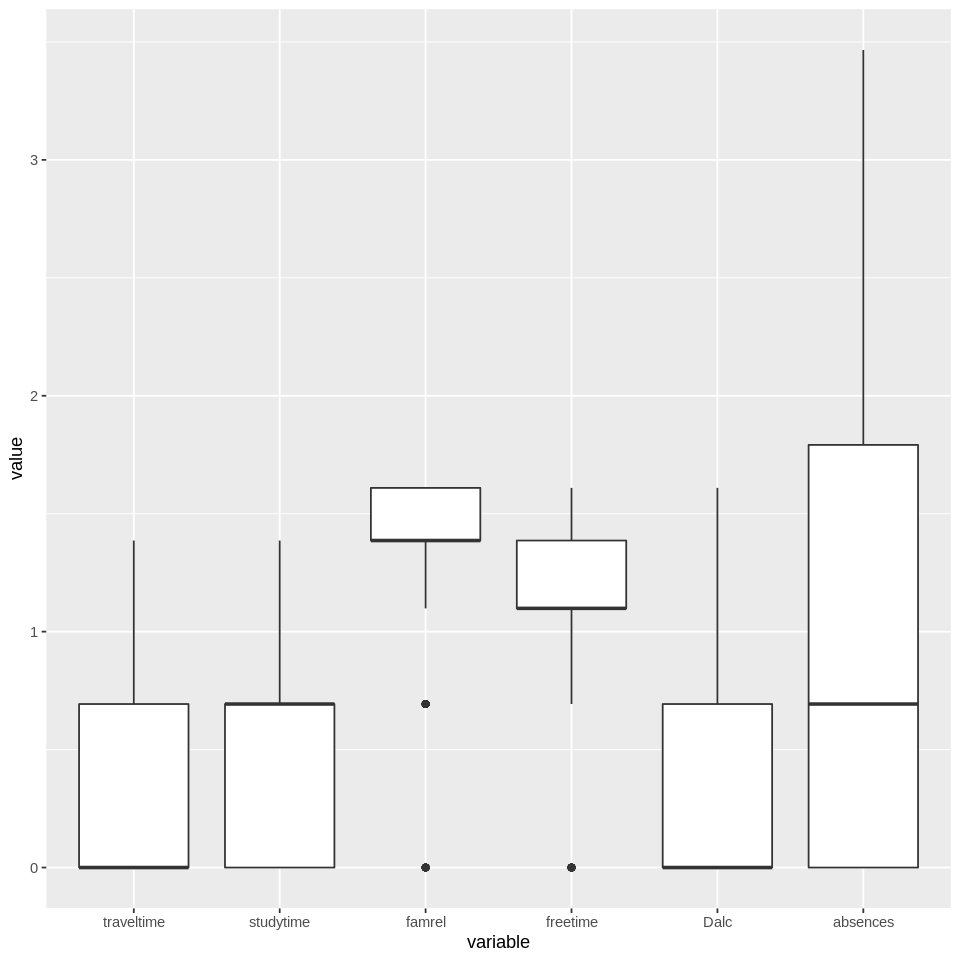

In [ ]:
# Depict Intermediate boxplots
options(repr.plot.width=8, repr.plot.height=8)
school1melt <- melt(log(school1[c(13, 14, 24, 25, 27, 30)])) 
boxes1 <- ggplot(data = school1melt, aes(x=variable, y=value)) + geom_boxplot()

school2melt <- melt(log(school2[c(13, 14, 24, 25, 27, 30)])) 
boxes2 <- ggplot(data = school2melt, aes(x=variable, y=value)) + geom_boxplot() 

boxes1
boxes2

In [ ]:
# Checking length of remained outliers
length(boxplot.stats(log(school1$famrel))$out)
length(boxplot.stats(log(school1$freetime))$out)

length(boxplot.stats(log(school2$famrel))$out)
length(boxplot.stats(log(school2$freetime))$out)

[1] 26

[1] 19

[1] 51

[1] 45

In [ ]:
# Delete outliers of "famrel" and "freetime" as they may not be eliminated via log-transformation.

### Correlations check

In [ ]:
corr <- cor(school1[,c(3, 7, 8, 13, 14, 24, 25, 26, 27, 28, 29, 30)])
print(round(corr, 2))

             age  Medu  Fedu traveltime studytime famrel freetime goout  Dalc
age         1.00 -0.16 -0.16       0.07      0.00   0.05     0.02  0.13  0.13
Medu       -0.16  1.00  0.62      -0.17      0.06   0.00     0.03  0.06  0.02
Fedu       -0.16  0.62  1.00      -0.16     -0.01   0.00    -0.01  0.04  0.00
traveltime  0.07 -0.17 -0.16       1.00     -0.10  -0.02    -0.02  0.03  0.14
studytime   0.00  0.06 -0.01      -0.10      1.00   0.04    -0.14 -0.06 -0.20
famrel      0.05  0.00  0.00      -0.02      0.04   1.00     0.15  0.06 -0.08
freetime    0.02  0.03 -0.01      -0.02     -0.14   0.15     1.00  0.29  0.21
goout       0.13  0.06  0.04       0.03     -0.06   0.06     0.29  1.00  0.27
Dalc        0.13  0.02  0.00       0.14     -0.20  -0.08     0.21  0.27  1.00
Walc        0.12 -0.05 -0.01       0.13     -0.25  -0.11     0.15  0.42  0.65
health     -0.06 -0.05  0.01       0.01     -0.08   0.09     0.08 -0.01  0.08
absences    0.18  0.10  0.03      -0.01     -0.06  -0.04    -0.0

In [ ]:
corr <- cor(school2[,c(3, 7, 8, 13, 14, 24, 25, 26, 27, 28, 29, 30)])
print(round(corr, 2))

             age  Medu  Fedu traveltime studytime famrel freetime goout  Dalc
age         1.00 -0.11 -0.12       0.03     -0.01  -0.02     0.00  0.11  0.13
Medu       -0.11  1.00  0.65      -0.27      0.10   0.02    -0.02  0.01 -0.01
Fedu       -0.12  0.65  1.00      -0.21      0.05   0.02     0.01  0.03  0.00
traveltime  0.03 -0.27 -0.21       1.00     -0.06  -0.01     0.00  0.06  0.09
studytime  -0.01  0.10  0.05      -0.06      1.00   0.00    -0.07 -0.08 -0.14
famrel     -0.02  0.02  0.02      -0.01      0.00   1.00     0.13  0.09 -0.08
freetime    0.00 -0.02  0.01       0.00     -0.07   0.13     1.00  0.35  0.11
goout       0.11  0.01  0.03       0.06     -0.08   0.09     0.35  1.00  0.25
Dalc        0.13 -0.01  0.00       0.09     -0.14  -0.08     0.11  0.25  1.00
Walc        0.09 -0.02  0.04       0.06     -0.21  -0.09     0.12  0.39  0.62
health     -0.01  0.00  0.04      -0.05     -0.06   0.11     0.08 -0.02  0.06
absences    0.15 -0.01  0.03      -0.02     -0.12  -0.09    -0.0

In [ ]:
# Eliminate regressor Walc, as it causes two multicollinearity cases.

## Baseline Model

In [ ]:
# Eliminate G1 and G2 regressors.
school1$G1 <- NULL
school1$G2 <- NULL

school2$G1 <- NULL
school2$G2 <- NULL

In [ ]:
# As a baseline model, take a very simple linear regression model with G3 as regressand and G1 & G2 as regressors.
# Common method
# Creating Validation Set
set.seed(15)
################################################ THIS PART OF THE CODE I TOOK FROM STACKOVERFLOW: https://stackoverflow.com/questions/36332878/cross-validation-for-linear-models-in-r
cdp <- createDataPartition(school1$G3, times=1, p=0.8, list=F)
training <- school1[cdp,]
test <- school1[-cdp,]
################################################

# Run the linear regression
modlin <- lm(G3 ~ age + Medu + Fedu + traveltime + studytime + famrel + freetime + goout + Dalc + Walc + health + absences, data=training)
preds <- predict(modlin, newdata=test)

# Calculate Mean Squared Error to measure accuracy
test <- as.data.table(test)
test <- test[,preds:=preds]
mse <- sum((test$G3 - test$preds)^2)/nrow(test)
mse

# Calculate R^squared to measure accuracy
rss <- mse * nrow(test) #residual sum of squares
tss <- sum((test$G3 - mean(test$G3))^2) #total sum of squares
rsq <- 1 - (rss/tss)
rsq

[1] 19.33442

[1] 0.1104145

In [ ]:
# Previous method is too long and inconvenient
set.seed(15) 
modlin <- train(G3 ~ age + Medu + Fedu + traveltime + studytime + famrel + freetime + goout + Dalc + Walc + health + absences, 
data = school1, method = "lm", trControl = trainControl(method = "cv", number = 10)) # 10-fold Cross-Validation is more precise than a Validation Set
summary(modlin)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2482  -1.8331   0.4813   2.8455   9.6182 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.28667    3.46678   4.409 1.35e-05 ***
age         -0.44202    0.18341  -2.410  0.01642 *  
Medu         0.72794    0.26666   2.730  0.00663 ** 
Fedu         0.10345    0.26332   0.393  0.69465    
traveltime  -0.43394    0.32803  -1.323  0.18668    
studytime    0.48711    0.27791   1.753  0.08044 .  
famrel       0.37590    0.25544   1.472  0.14196    
freetime     0.27530    0.24079   1.143  0.25363    
goout       -0.73864    0.23062  -3.203  0.00147 ** 
Dalc        -0.21145    0.33402  -0.633  0.52708    
Walc         0.38063    0.24864   1.531  0.12664    
health      -0.24076    0.16259  -1.481  0.13949    
absences     0.01719    0.02950   0.583  0.56050    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 

In [ ]:
# The same model for school2 dataset
set.seed(15) 
modlin <- train(G3 ~ age + Medu + Fedu + traveltime + studytime + famrel + freetime + goout + Dalc + Walc + health + absences,
data = school2, method = "lm", trControl = trainControl(method = "cv", number = 10)) 
summary(modlin)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.7364  -1.5755   0.0705   1.7114   8.3340 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.062404   1.854411   7.044 4.87e-12 ***
age         -0.136211   0.098903  -1.377  0.16893    
Medu         0.368480   0.138060   2.669  0.00780 ** 
Fedu         0.314824   0.140518   2.240  0.02541 *  
traveltime  -0.206096   0.163232  -1.263  0.20720    
studytime    0.745486   0.145754   5.115 4.16e-07 ***
famrel       0.217865   0.125849   1.731  0.08391 .  
freetime    -0.283818   0.120064  -2.364  0.01838 *  
goout       -0.008463   0.116068  -0.073  0.94190    
Dalc        -0.447523   0.162848  -2.748  0.00616 ** 
Walc        -0.041790   0.125183  -0.334  0.73862    
health      -0.194884   0.082722  -2.356  0.01878 *  
absences    -0.028359   0.027779  -1.021  0.30771    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual st

## Advancing the Model

### Initial Preparations

In [ ]:
# Reset data
school1=read.table("student-mat.csv",sep=";",header=TRUE)
school2=read.table("student-por.csv",sep=";",header=TRUE)

In [ ]:
# Eliminating irrelevant regressors
school1$G1 <- NULL
school1$G2 <- NULL
school1$Walc <- NULL
school1$failures <- NULL

school2$G1 <- NULL
school2$G2 <- NULL
school2$Walc <- NULL
school2$failures <- NULL

In [ ]:
# Add ones to zeroes in "absences"
school1$absences <- ifelse(school1$absences==0, 1, school1$absences)
school2$absences <- ifelse(school2$absences==0, 1, school2$absences)

In [ ]:
# Log-transform some of the regressors to eliminate outliers
school1$traveltime <- log(school1$traveltime)
school1$studytime <- log(school1$studytime)
school1$Dalc <- log(school1$Dalc)
school1$absences <- log(school1$absences)

school2$traveltime <- log(school2$traveltime)
school2$studytime <- log(school2$studytime)
school2$Dalc <- log(school2$Dalc)
school2$absences <- log(school2$absences)

In [ ]:
# Delete some of the observations that are outliers and may not be cured by log-transformation
school1 <- school1[school1$age < min(boxplot.stats(school1$age)$out),]
school1 <- school1[school1$Fedu > max(boxplot.stats(school1$Fedu)$out),]
school1 <- school1[school1$famrel > max(boxplot.stats(school1$famrel)$out),]
school1 <- school1[school1$freetime > max(boxplot.stats(school1$freetime)$out),]

school2 <- school2[school2$age < min(boxplot.stats(school2$age)$out),]
school2 <- school2[school2$famrel > max(boxplot.stats(school2$famrel)$out),]
school2 <- school2[school2$freetime > max(boxplot.stats(school2$freetime)$out),]
school2 <- school2[school2$G3 > max(boxplot.stats(school2$G3)$out),]

Using school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic as id variables

Using school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic as id variables



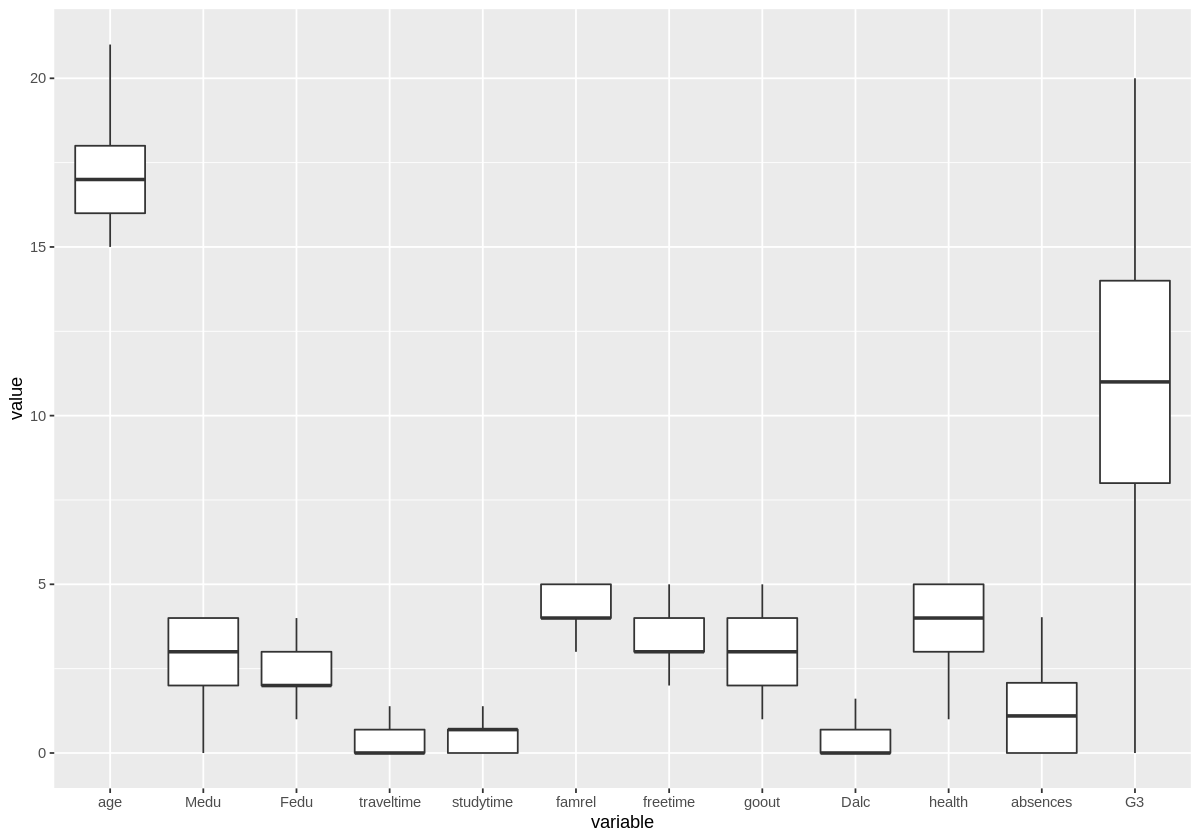

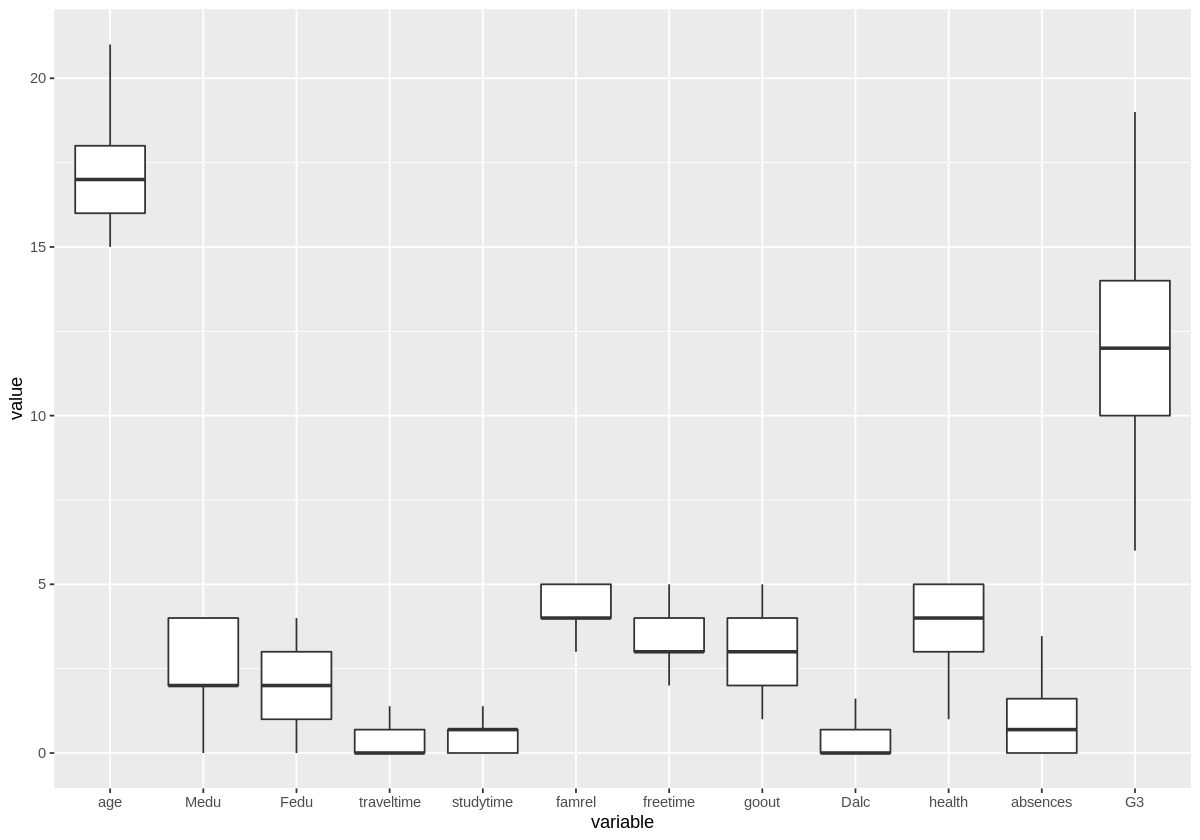

In [ ]:
# And now boxplots look like:
options(repr.plot.width=10, repr.plot.height=7)

school1melt <- melt(school1) 
boxes1 <- ggplot(data = school1melt, aes(x=variable, y=value)) + geom_boxplot()

school2melt <- melt(school2) 
boxes2 <- ggplot(data = school2melt, aes(x=variable, y=value)) + geom_boxplot() 

boxes1
boxes2

### Dealing with categorical variables

In [ ]:
# Here we need to apply DummyEncoding (making n-1 levels for a categorical variable with n levels to avoid Dummy Variable Trap)
dummies <- dummyVars( ~ ., data=school1, fullRank=T, drop2nd=T)
pred <- predict(dummies, newdata = school1)
school1 <- data.table(pred)
str(school1)

Classes ‘data.table’ and 'data.frame':	349 obs. of  38 variables:
 $ schoolMS        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ sexM            : num  0 0 0 0 0 1 1 1 1 0 ...
 $ age             : num  18 17 15 15 16 16 16 15 15 15 ...
 $ addressU        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ famsizeLE3      : num  0 0 1 0 0 1 1 1 0 0 ...
 $ PstatusT        : num  0 1 1 1 1 1 1 0 1 1 ...
 $ Medu            : num  4 1 1 4 3 4 2 3 3 4 ...
 $ Fedu            : num  4 1 1 2 3 3 2 2 4 4 ...
 $ Mjobhealth      : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Mjobother       : num  0 0 0 0 1 0 1 0 1 0 ...
 $ Mjobservices    : num  0 0 0 0 0 1 0 1 0 0 ...
 $ Mjobteacher     : num  0 0 0 0 0 0 0 0 0 1 ...
 $ Fjobhealth      : num  0 0 0 0 0 0 0 0 0 1 ...
 $ Fjobother       : num  0 1 1 0 1 1 1 1 1 0 ...
 $ Fjobservices    : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Fjobteacher     : num  1 0 0 0 0 0 0 0 0 0 ...
 $ reasonhome      : num  0 0 0 1 1 0 1 1 1 0 ...
 $ reasonother     : num  0 0 1 0 0 0 0 0 0 0 ...
 $ reasonreputation: num

In [ ]:
# For school2 dataset
dummies <- dummyVars( ~ ., data=school2, fullRank=T, drop2nd=T)
pred2 <- predict(dummies, newdata = school1)
school2 <- data.table(pred2)
str(school2)

Classes ‘data.table’ and 'data.frame':	542 obs. of  38 variables:
 $ schoolMS        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ sexM            : num  0 0 0 0 0 1 1 1 1 0 ...
 $ age             : num  18 17 15 15 16 16 16 15 15 15 ...
 $ addressU        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ famsizeLE3      : num  0 0 1 0 0 1 1 1 0 0 ...
 $ PstatusT        : num  0 1 1 1 1 1 1 0 1 1 ...
 $ Medu            : num  4 1 1 4 3 4 2 3 3 4 ...
 $ Fedu            : num  4 1 1 2 3 3 2 2 4 4 ...
 $ Mjobhealth      : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Mjobother       : num  0 0 0 0 1 0 1 0 1 0 ...
 $ Mjobservices    : num  0 0 0 0 0 1 0 1 0 0 ...
 $ Mjobteacher     : num  0 0 0 0 0 0 0 0 0 1 ...
 $ Fjobhealth      : num  0 0 0 0 0 0 0 0 0 1 ...
 $ Fjobother       : num  0 1 1 0 1 1 1 1 1 0 ...
 $ Fjobservices    : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Fjobteacher     : num  1 0 0 0 0 0 0 0 0 0 ...
 $ reasonhome      : num  0 0 0 1 1 0 1 1 1 0 ...
 $ reasonother     : num  0 0 1 0 0 0 0 0 0 0 ...
 $ reasonreputation: num

### Linear Regression

In [ ]:
# Linear Regression for school1
set.seed(15) 
modlin <- train(G3 ~ ., data = school1, method = "lm", trControl = trainControl(method = "cv", number = 10))
summary(modlin)
print(modlin)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.9457  -2.0241   0.3811   2.8258   9.0354 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      14.82907    4.82912   3.071 0.002324 ** 
schoolMS          0.75808    0.87939   0.862 0.389322    
sexM              1.35065    0.52784   2.559 0.010976 *  
age              -0.54771    0.23560  -2.325 0.020729 *  
addressU          1.16142    0.64307   1.806 0.071879 .  
famsizeLE3        0.71320    0.53225   1.340 0.181237    
PstatusT         -0.53062    0.81112  -0.654 0.513476    
Medu              0.32428    0.34680   0.935 0.350476    
Fedu              0.26135    0.29469   0.887 0.375847    
Mjobhealth        1.95111    1.24833   1.563 0.119074    
Mjobother         0.04089    0.77334   0.053 0.957861    
Mjobservices      0.39301    0.86382   0.455 0.649451    
Mjobteacher      -0.36251    1.14027  -0.318 0.750759    
Fjobhealth       -0.255

Linear Regression 

349 samples
 37 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 315, 314, 315, 315, 313, 314, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  4.404832  0.1330505  3.410633

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
# LR for school2
set.seed(15) 
modlin <- train(G3 ~ ., data = school2, method = "lm", trControl = trainControl(method = "cv", number = 10)) 
summary(modlin)
print(modlin)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5387 -1.4944 -0.0735  1.3568  6.6626 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       9.95297    1.84967   5.381 1.14e-07 ***
schoolMS         -0.60159    0.25176  -2.390  0.01724 *  
sexM             -0.67262    0.22128  -3.040  0.00249 ** 
age               0.14115    0.09128   1.546  0.12263    
addressU          0.23060    0.24389   0.946  0.34486    
famsizeLE3        0.01085    0.22148   0.049  0.96095    
PstatusT         -0.18026    0.32867  -0.548  0.58362    
Medu              0.26720    0.13841   1.931  0.05410 .  
Fedu              0.04066    0.12260   0.332  0.74031    
Mjobhealth        0.34837    0.48689   0.715  0.47463    
Mjobother         0.38252    0.27735   1.379  0.16844    
Mjobservices      0.48414    0.34333   1.410  0.15912    
Mjobteacher       0.69280    0.45603   1.519  0.12934    
Fjobhealth       -0.54004    0.67

Linear Regression 

542 samples
 37 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 488, 488, 488, 488, 487, 488, ... 
Resampling results:

  RMSE   Rsquared   MAE     
  2.278  0.2752722  1.817781

Tuning parameter 'intercept' was held constant at a value of TRUE


### Generalized Models

#### Generalized Linear Model 

In [ ]:
# Performance of GLM with expand.grid() as a Cross-Validation procedure
set.seed(15) 
mat <- as.matrix(school1[,-38])
x1 <- Matrix(mat,sparse=T)

mat <- as.matrix(school2[,-38])
x2 <- Matrix(mat,sparse=T)

ggrid <- expand.grid(.alpha=c(0.1, 0.2, 0.4, 0.55, 0.8), .lambda=c(0.1, 0.15, 0.2, 0.25, 0.3))

modglm1 <- train(x1, school1$G3, data = school1, method = "glmnet", trControl = trainControl(method = "cv", number = 10), tuneGrid=ggrid) 

modglm2 <- train(x2, school2$G3, data = school2, method = "glmnet", trControl = trainControl(method = "cv", number = 10), tuneGrid=ggrid) 

print(modglm1)
print(modglm2)

Warning message in train.default(x1, school1$G3, data = school1, method = "glmnet", :
“The training data could not be converted to a data frame for saving”
Warning message in train.default(x2, school2$G3, data = school2, method = "glmnet", :
“The training data could not be converted to a data frame for saving”


glmnet 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 315, 314, 315, 315, 313, 314, ... 
Resampling results across tuning parameters:

  alpha  lambda  RMSE      Rsquared   MAE     
  0.10   0.10    4.369366  0.1362886  3.374132
  0.10   0.15    4.355988  0.1373167  3.360380
  0.10   0.20    4.344917  0.1380050  3.348045
  0.10   0.25    4.335613  0.1385454  3.337161
  0.10   0.30    4.327511  0.1390262  3.327416
  0.20   0.10    4.356708  0.1371895  3.360981
  0.20   0.15    4.341532  0.1379805  3.343870
  0.20   0.20    4.329501  0.1385891  3.330251
  0.20   0.25    4.319459  0.1391382  3.318097
  0.20   0.30    4.311055  0.1394989  3.308748
  0.40   0.10    4.338472  0.1379902  3.340784
  0.40   0.15    4.320870  0.1387854  3.320577
  0.40   0.20    4.306100  0.1398152  3.305665
  0.40   0.25    4.294356  0.1410202  3.295043
  0.40   0.30    4.287186  0.1416788  3.289481
  0.55   0.10    4.327915  0.1384323  3.328613
  0.55   0.15    4.307396  0.

#### Generalized Additive Model (GAM) with Cubic Splines

In [ ]:
# GAM
set.seed(15) 
modgam1 <- train(G3 ~., data = school1, method = "gam", trControl = trainControl(method = "cv", number = 10)) 

modgam2 <- train(G3 ~., data = school2, method = "gam", trControl = trainControl(method = "cv", number = 10)) 

summary(modgam1)
print(modgam1)

summary(modgam2)
print(modgam2)


Family: gaussian 
Link function: identity 

Formula:
.outcome ~ schoolMS + sexM + addressU + famsizeLE3 + PstatusT + 
    Mjobhealth + Mjobother + Mjobservices + Mjobteacher + Fjobother + 
    Fjobservices + Fjobteacher + reasonhome + reasonother + reasonreputation + 
    guardianmother + guardianother + schoolsupyes + famsupyes + 
    paidyes + activitiesyes + nurseryyes + internetyes + romanticyes + 
    famrel + Fedu + traveltime + studytime + freetime + Medu + 
    goout + Dalc + health + age + s(absences)

Parametric coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      15.75595    4.41642   3.568 0.000417 ***
schoolMS          0.50384    0.86166   0.585 0.559155    
sexM              1.05281    0.51278   2.053 0.040896 *  
addressU          1.12804    0.63109   1.787 0.074839 .  
famsizeLE3        0.74160    0.52001   1.426 0.154838    
PstatusT         -0.86881    0.79550  -1.092 0.275610    
Mjobhealth        1.70260    1.19290   1.427 0.1545

Generalized Additive Model using Splines 

349 samples
 37 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 315, 314, 315, 315, 313, 314, ... 
Resampling results across tuning parameters:

  select  RMSE      Rsquared   MAE     
  FALSE   4.269259  0.1746615  3.333652
   TRUE   4.275402  0.1710356  3.339649

Tuning parameter 'method' was held constant at a value of GCV.Cp
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were select = FALSE and method = GCV.Cp.



Family: gaussian 
Link function: identity 

Formula:
.outcome ~ schoolMS + sexM + addressU + famsizeLE3 + PstatusT + 
    Mjobhealth + Mjobother + Mjobservices + Mjobteacher + Fjobother + 
    Fjobservices + Fjobteacher + reasonhome + reasonother + reasonreputation + 
    guardianmother + guardianother + schoolsupyes + famsupyes + 
    paidyes + activitiesyes + nurseryyes + higheryes + internetyes + 
    romanticyes + famrel + traveltime + studytime + freetime + 
    Medu + Fedu + goout + Dalc + health + age + s(absences)

Parametric coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       9.28956    1.83064   5.074 5.47e-07 ***
schoolMS         -0.58820    0.25111  -2.342  0.01955 *  
sexM             -0.66683    0.22108  -3.016  0.00269 ** 
addressU          0.23498    0.24374   0.964  0.33548    
famsizeLE3        0.01042    0.22140   0.047  0.96248    
PstatusT         -0.18739    0.32843  -0.571  0.56855    
Mjobhealth        0.27712    0.47851   

Generalized Additive Model using Splines 

542 samples
 37 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 488, 489, 488, 488, 489, 488, ... 
Resampling results across tuning parameters:

  select  RMSE      Rsquared   MAE     
  FALSE   2.263505  0.2823807  1.816101
   TRUE   2.265483  0.2815241  1.818672

Tuning parameter 'method' was held constant at a value of GCV.Cp
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were select = FALSE and method = GCV.Cp.


### Support Vector Machines (SVM)

#### Polynomial Support Vector Machine

In [ ]:
# POLYNOMIAL SUPPORT VECTOR MACHINE
set.seed(15)

ggrid <- expand.grid(.degree=c(2, 3), .scale=c(0.01, 0.011, 0.012, 0.013, 0.014), .C=c(0.8, 1, 1.2, 1.4))

modsvp1 <- train(G3 ~ ., data = school1, method = "svmPoly", trControl = trainControl(method = "cv", number = 10), tuneGrid=ggrid, trace=F)

modsvp2 <- train(G3 ~., data = school2, method = "svmPoly", trControl = trainControl(method = "cv", number = 10), tuneGrid=ggrid, trace=F) 

print(modsvp1)
print(modsvp2)

Support Vector Machines with Polynomial Kernel 

349 samples
 37 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 315, 314, 315, 315, 313, 314, ... 
Resampling results across tuning parameters:

  degree  scale  C    RMSE      Rsquared   MAE     
  2       0.010  0.8  4.362840  0.1380390  3.227620
  2       0.010  1.0  4.371713  0.1386892  3.238199
  2       0.010  1.2  4.376106  0.1393277  3.245851
  2       0.010  1.4  4.379326  0.1395205  3.253510
  2       0.011  0.8  4.367581  0.1384008  3.231686
  2       0.011  1.0  4.373313  0.1393738  3.241750
  2       0.011  1.2  4.377789  0.1396169  3.252850
  2       0.011  1.4  4.386031  0.1392712  3.270319
  2       0.012  0.8  4.369653  0.1394148  3.235478
  2       0.012  1.0  4.374801  0.1398288  3.248297
  2       0.012  1.2  4.384415  0.1395247  3.269042
  2       0.012  1.4  4.397658  0.1391431  3.291000
  2       0.013  0.8  4.369745  0.1400160  3.239151
  2       0.013  1.0  4.380806  0

#### Radial Support Vector Machine

In [ ]:
# RADIAL SUPPORT VECTOR MACHINE
set.seed(15)
ggrid <- expand.grid(.C=c(0.8,0.9,1,1.1,1.2), .sigma=0.01816739)

modsvr1 <- train(G3 ~ ., data = school1, method = "svmRadial", trControl = trainControl(method = "cv", number = 10), tuneGrid=ggrid, trace=F)

modsvr2 <- train(G3 ~., data = school2, method = "svmRadial", trControl = trainControl(method = "cv", number = 10), tuneGrid=ggrid, trace=F) 

print(modsvr1)
print(modsvr2)

Support Vector Machines with Radial Basis Function Kernel 

349 samples
 37 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 315, 314, 315, 315, 313, 314, ... 
Resampling results across tuning parameters:

  C    RMSE      Rsquared   MAE     
  0.8  4.302607  0.1591153  3.190768
  0.9  4.304366  0.1590280  3.196707
  1.0  4.308632  0.1583608  3.206235
  1.1  4.314733  0.1571222  3.217384
  1.2  4.321655  0.1558050  3.228441

Tuning parameter 'sigma' was held constant at a value of 0.01816739
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were sigma = 0.01816739 and C = 0.8.
Support Vector Machines with Radial Basis Function Kernel 

542 samples
 37 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 488, 488, 488, 488, 487, 488, ... 
Resampling results across tuning parameters:

  C    RMSE      Rsquared   MAE     
  0.8  2.292046  0.2678419  1.8

### Boosting

#### Boosted Tree

In [ ]:
# Boosted Tree
set.seed(15)
ggrid <- expand.grid(.maxdepth=c(10,20,30,40), .mstop=c(50,100,150))

modsvr1 <- train(G3 ~ ., data = school1, method = "blackboost", trControl = trainControl(method = "cv", number = 10),tuneGrid = ggrid)

modsvr2 <- train(G3 ~., data = school2, method = "blackboost", trControl = trainControl(method = "cv", number = 10),tuneGrid = ggrid) 

print(modsvr1)
print(modsvr2)

Boosted Tree 

349 samples
 37 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 315, 314, 315, 315, 313, 314, ... 
Resampling results across tuning parameters:

  maxdepth  mstop  RMSE      Rsquared   MAE     
  10         50    4.472734  0.0817277  3.363367
  10        100    4.472734  0.0817277  3.363367
  10        150    4.472734  0.0817277  3.363367
  20         50    4.472734  0.0817277  3.363367
  20        100    4.472734  0.0817277  3.363367
  20        150    4.472734  0.0817277  3.363367
  30         50    4.472734  0.0817277  3.363367
  30        100    4.472734  0.0817277  3.363367
  30        150    4.472734  0.0817277  3.363367
  40         50    4.472734  0.0817277  3.363367
  40        100    4.472734  0.0817277  3.363367
  40        150    4.472734  0.0817277  3.363367

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mstop = 50 and maxdepth = 10.
Boosted Tree 

542

#### Boosted GLM

In [ ]:
# BGLM
set.seed(15)
ggrid <- expand.grid(.mstop=c(250,300,400,500,600),.prune="no")

modsvr1 <- train(G3 ~ ., data = school1, method = "glmboost", trControl = trainControl(method = "cv", number = 10),tuneGrid = ggrid)

modsvr2 <- train(G3 ~., data = school2, method = "glmboost", trControl = trainControl(method = "cv", number = 10),tuneGrid = ggrid) 

print(modsvr1)
print(modsvr2)

Boosted Generalized Linear Model 

349 samples
 37 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 315, 314, 315, 315, 313, 314, ... 
Resampling results across tuning parameters:

  mstop  RMSE      Rsquared   MAE     
  250    4.283732  0.1433682  3.293791
  300    4.293457  0.1421374  3.301667
  400    4.311524  0.1411627  3.318624
  500    4.323661  0.1411949  3.328834
  600    4.335616  0.1405798  3.342144

Tuning parameter 'prune' was held constant at a value of no
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mstop = 250 and prune = no.
Boosted Generalized Linear Model 

542 samples
 37 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 488, 488, 487, 488, 488, 488, ... 
Resampling results across tuning parameters:

  mstop  RMSE      Rsquared   MAE     
  250    2.263486  0.2847126  1.814569
  300    2.263144  0.2853364  1.812089
 

# PART 3: CLASSIFICATION ANALYSIS

## Data Retrieval

In [ ]:
bank <- read.table("bank.csv",sep=";",header=TRUE)
bank <- as.data.table(bank)

bank <- bank[,y:=ifelse(y=="yes",1,0)]
table(bank$y)


   0    1 
4000  521 

## Exploratory Data Analysis

### Initial Analysis

In [ ]:
# Investigate structure of dataset
head(bank)

age job         marital education default balance housing loan contact  day
1 30  unemployed  married primary   no      1787    no      no   cellular 19 
2 33  services    married secondary no      4789    yes     yes  cellular 11 
3 35  management  single  tertiary  no      1350    yes     no   cellular 16 
4 30  management  married tertiary  no      1476    yes     yes  unknown   3 
5 59  blue-collar married secondary no         0    yes     no   unknown   5 
6 35  management  single  tertiary  no       747    no      no   cellular 23 
  month duration campaign pdays previous poutcome y
1 oct    79      1         -1   0        unknown  0
2 may   220      1        339   4        failure  0
3 apr   185      1        330   1        failure  0
4 jun   199      4         -1   0        unknown  0
5 may   226      1         -1   0        unknown  0
6 feb   141      2        176   3        failure  0

In [ ]:
# Investigate structure of dataset
summary(bank)

      age            job              marital           education        
 Min.   :19.00   Length:4521        Length:4521        Length:4521       
 1st Qu.:33.00   Class :character   Class :character   Class :character  
 Median :39.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :41.17                                                           
 3rd Qu.:49.00                                                           
 Max.   :87.00                                                           
   default             balance        housing              loan          
 Length:4521        Min.   :-3313   Length:4521        Length:4521       
 Class :character   1st Qu.:   69   Class :character   Class :character  
 Mode  :character   Median :  444   Mode  :character   Mode  :character  
                    Mean   : 1423                                        
                    3rd Qu.: 1480                                        
                    Max.   :71188     

In [ ]:
# The following code I took from StackOverflow: https://stackoverflow.com/questions/24027605/determine-the-number-of-na-values-in-a-column
unlist(lapply(bank, function(x) {length(which(is.na(x)))}))

age       job   marital education   default   balance   housing      loan 
        0         0         0         0         0         0         0         0 
  contact       day     month  duration  campaign     pdays  previous  poutcome 
        0         0         0         0         0         0         0         0 
        y 
        0

Using job, marital, education, default, housing, loan, contact, month, poutcome as id variables



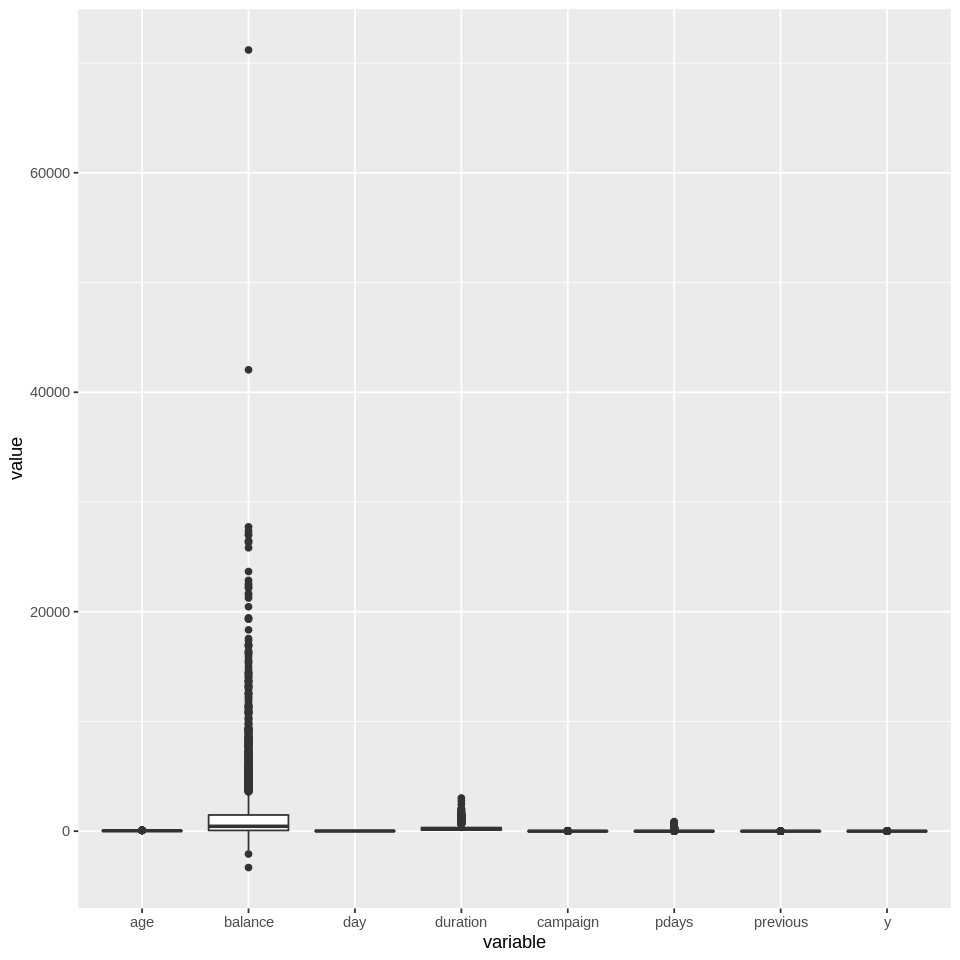

In [ ]:
# Boxplots
options(repr.plot.width=8, repr.plot.height=8)
bankmelt <- melt(bank) 
boxes <- ggplot(data = bankmelt, aes(x=variable, y=value)) + geom_boxplot()
boxes

### Balance Regressor

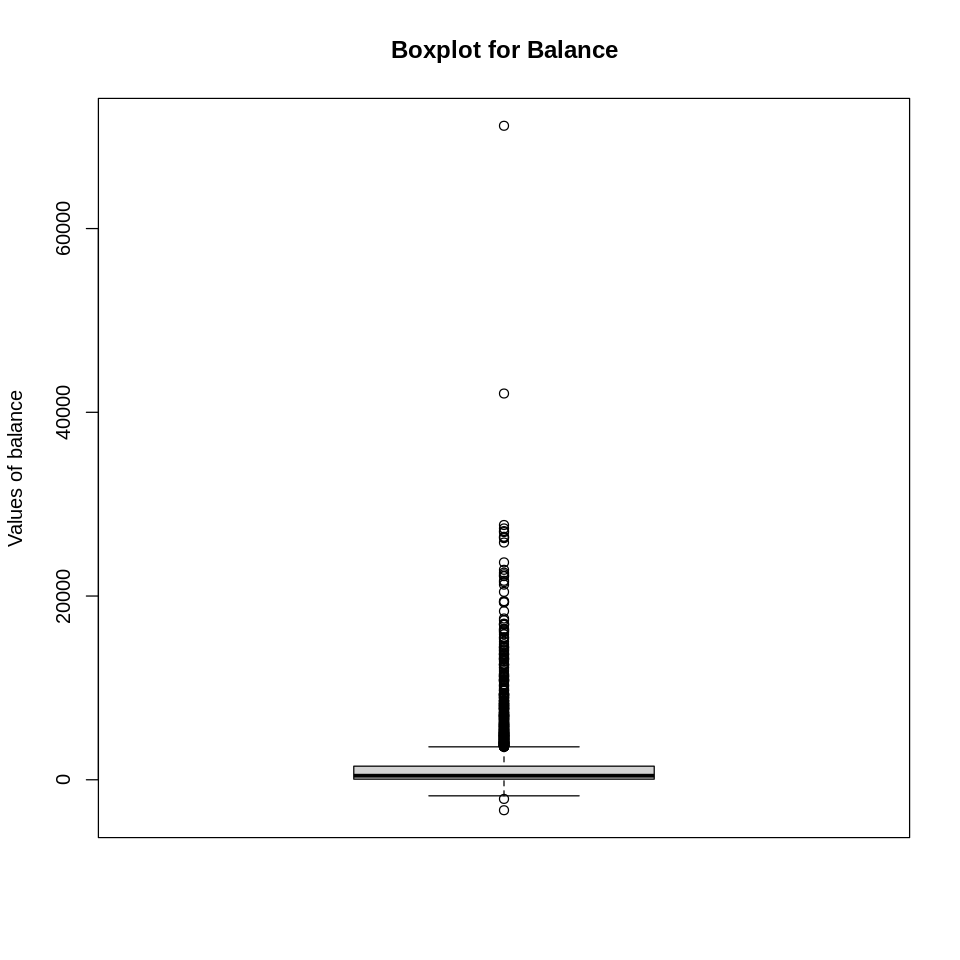

In [ ]:
boxplot(bank$balance, ylab="Values of balance", main="Boxplot for Balance")

In [ ]:
# Check skewness and kurtosis
skewness(bank$balance)
kurtosis(bank$balance)

[1] 6.592054

[1] 88.2509

In [ ]:
# Check total share of negative values in bank$balance
nrow(bank[bank$balance>0])
nrow(bank[bank$balance<0])
paste0("Thus, total share of negative values is ", nrow(bank[bank$balance<0])/nrow(bank) * 100, " %")

[1] 3798

[1] 366

[1] "Thus, total share of negative values is 8.09555408095554 %"

### Pdays Regressor

[1] "The number of -1 observations in pdays regressor is 3705"

[1] "The number of other observations in pdays regressor is 816"

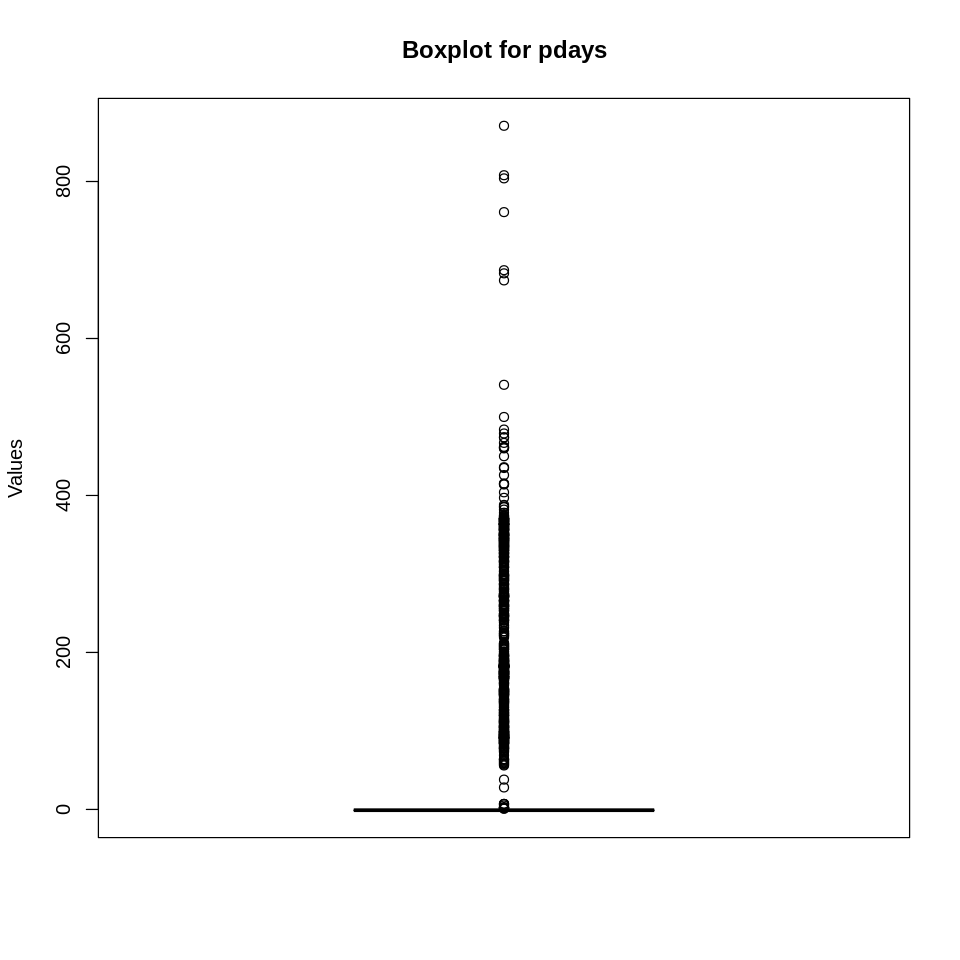

In [ ]:
# Let's move to pdays regressor.
paste0("The number of -1 observations in pdays regressor is ", nrow(bank[bank$pdays == -1]))
paste0("The number of other observations in pdays regressor is ", nrow(bank[bank$pdays >= 0]))
boxplot(bank$pdays, ylab="Values", main="Boxplot for pdays")

### Age, Campaign and Previous Regressors

[1] "The following are the first twenty outliers of previous feature: c(4, 1, 3, 2, 2, 1, 2, 1, 2, 2, 3, 2, 1, 1, 5, 3, 1, 1, 2, 20)"

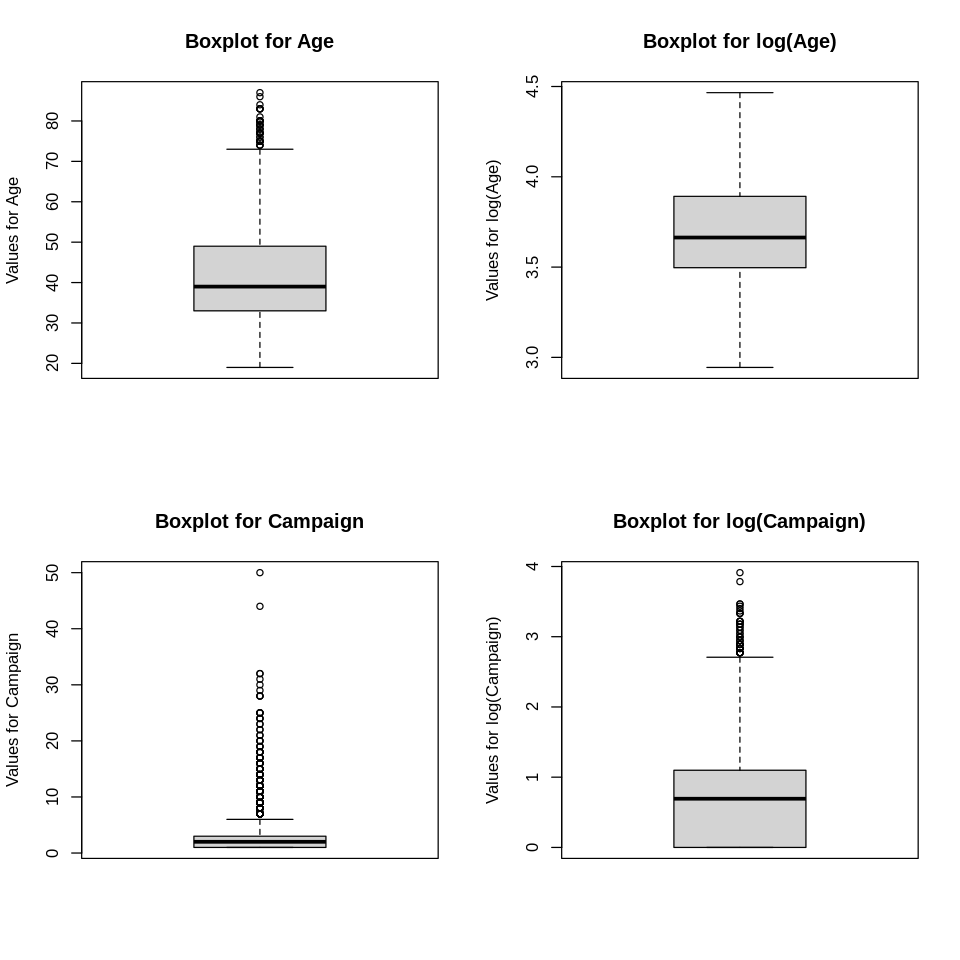

In [ ]:
# Now let's look at age, campaign and previous regressors.
par(mfrow=c(2,2))
# AGE
outlied_age <- boxplot.stats(bank$age)$out
outlied_log_age <- boxplot.stats(log(bank$age))$out
# CAMPAIGN
outlied_camp <- boxplot.stats(bank$campaign)$out
outlied_log_camp <- boxplot.stats(log(bank$campaign))$out
# PREVIOUS
outlied_previous <- boxplot.stats(bank$previous)$out

boxplot(bank$age, ylab="Values for Age", main="Boxplot for Age")
boxplot(log(bank$age), ylab="Values for log(Age)", main="Boxplot for log(Age)")
boxplot(bank$campaign, ylab="Values for Campaign", main="Boxplot for Campaign")
boxplot(log(bank$campaign), ylab="Values for log(Campaign)", main="Boxplot for log(Campaign)")
paste0("The following are the first twenty outliers of previous feature: ", list(head(outlied_previous, 20)))

### Other Classification Regressors

In [ ]:
#For other classification features I will apply OneHotEncoding in order to divide them intodummy variables.
#There is a risk of dummy variable trap emergence, so we exclude interceptterm from the analyzed models.

### Checking correlations

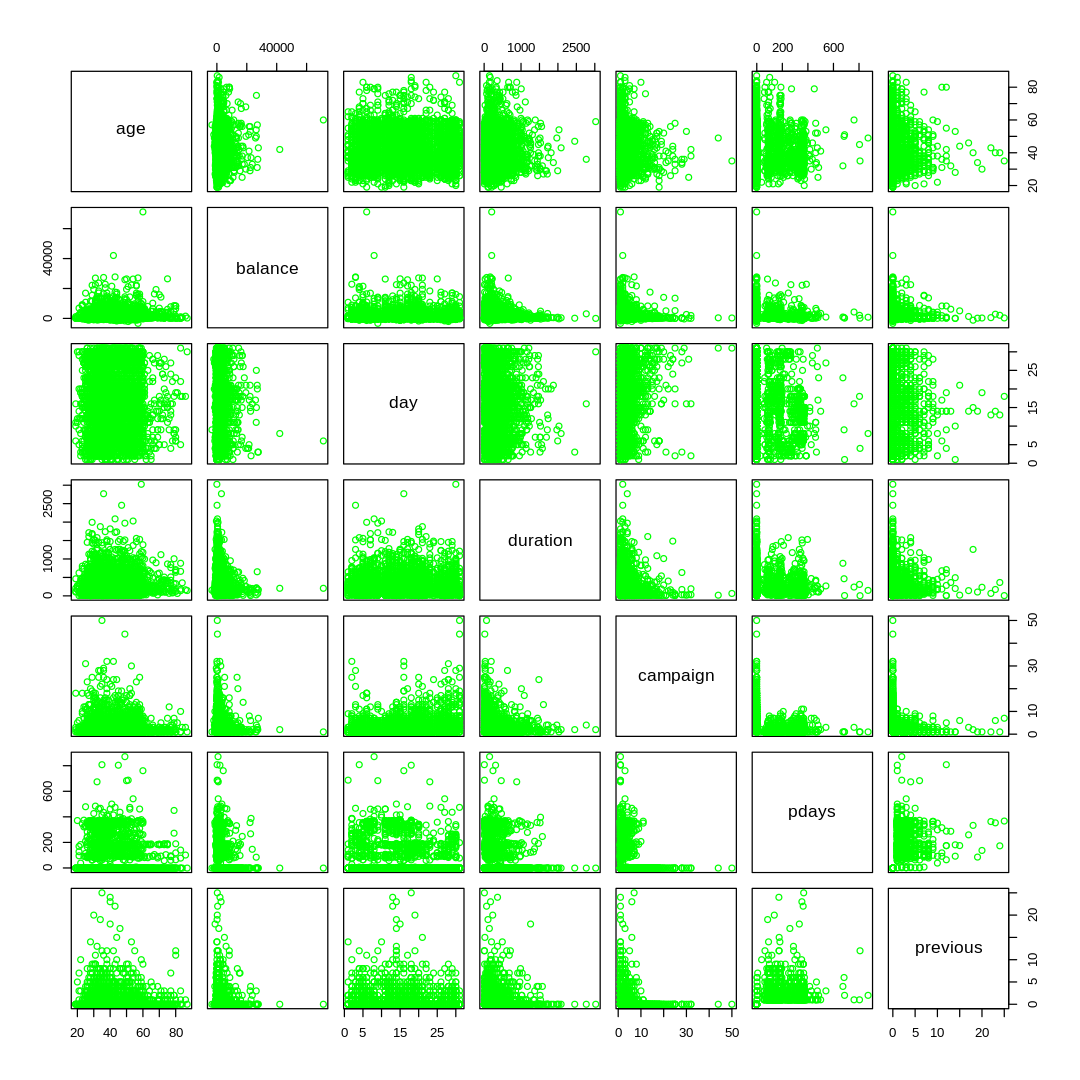

In [ ]:
options(repr.plot.width=9, repr.plot.height=9)

pairs(bank[,c(1,6,10,12,13,14,15)], col="green")

In [ ]:
# Check correlations
corr <- cor(bank[,c(1,6,10,12,13,14,15)])
print(round(corr, 2))

corr <- cor(bank[,c(1,6,10,12,13,15)])
print(round(corr, 2))

corr <- cor(bank[,c(1,6,10,12,13,14)])
print(round(corr, 2))

           age balance   day duration campaign pdays previous
age       1.00    0.08 -0.02     0.00    -0.01 -0.01     0.00
balance   0.08    1.00 -0.01    -0.02    -0.01  0.01     0.03
day      -0.02   -0.01  1.00    -0.02     0.16 -0.09    -0.06
duration  0.00   -0.02 -0.02     1.00    -0.07  0.01     0.02
campaign -0.01   -0.01  0.16    -0.07     1.00 -0.09    -0.07
pdays    -0.01    0.01 -0.09     0.01    -0.09  1.00     0.58
previous  0.00    0.03 -0.06     0.02    -0.07  0.58     1.00
           age balance   day duration campaign previous
age       1.00    0.08 -0.02     0.00    -0.01     0.00
balance   0.08    1.00 -0.01    -0.02    -0.01     0.03
day      -0.02   -0.01  1.00    -0.02     0.16    -0.06
duration  0.00   -0.02 -0.02     1.00    -0.07     0.02
campaign -0.01   -0.01  0.16    -0.07     1.00    -0.07
previous  0.00    0.03 -0.06     0.02    -0.07     1.00
           age balance   day duration campaign pdays
age       1.00    0.08 -0.02     0.00    -0.01 -0.01
balanc

## Baseline Model

In [ ]:
# LINEAR REGRESSION
set.seed(15) 
modlin <- train(y ~ duration, data = bank, method = "lm", trControl = trainControl(method = "cv", number = 10)) # 10-fold Cross-Validation
print(modlin)
summary(modlin)

# Warning message occurs as I apply linear regression in the classification problem - this is indeed 
# not the best way of analysis in this case. But here it is just a baseline model.

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”


Linear Regression 

4521 samples
   1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4069, 4069, 4069, 4068, 4069, 4069, ... 
Resampling results:

  RMSE       Rsquared  MAE      
  0.2926758  0.166457  0.1721144

Tuning parameter 'intercept' was held constant at a value of TRUE



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47629 -0.11329 -0.05758 -0.01963  1.00009 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.488e-02  6.203e-03  -2.399   0.0165 *  
duration     4.930e-04  1.675e-05  29.436   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2926 on 4519 degrees of freedom
Multiple R-squared:  0.1609,	Adjusted R-squared:  0.1607 
F-statistic: 866.5 on 1 and 4519 DF,  p-value: < 2.2e-16


## Advancing the Model

### Initial preparations

In [ ]:
# Now eliminate duration regressor
bank$duration <- NULL

In [ ]:
# As balance may be negative, make rows with balance <= 0 be equal to 1:
bank$balance <- ifelse(bank$balance<=0, 1, bank$balance)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   4.234   6.096   5.324   7.300  11.173 

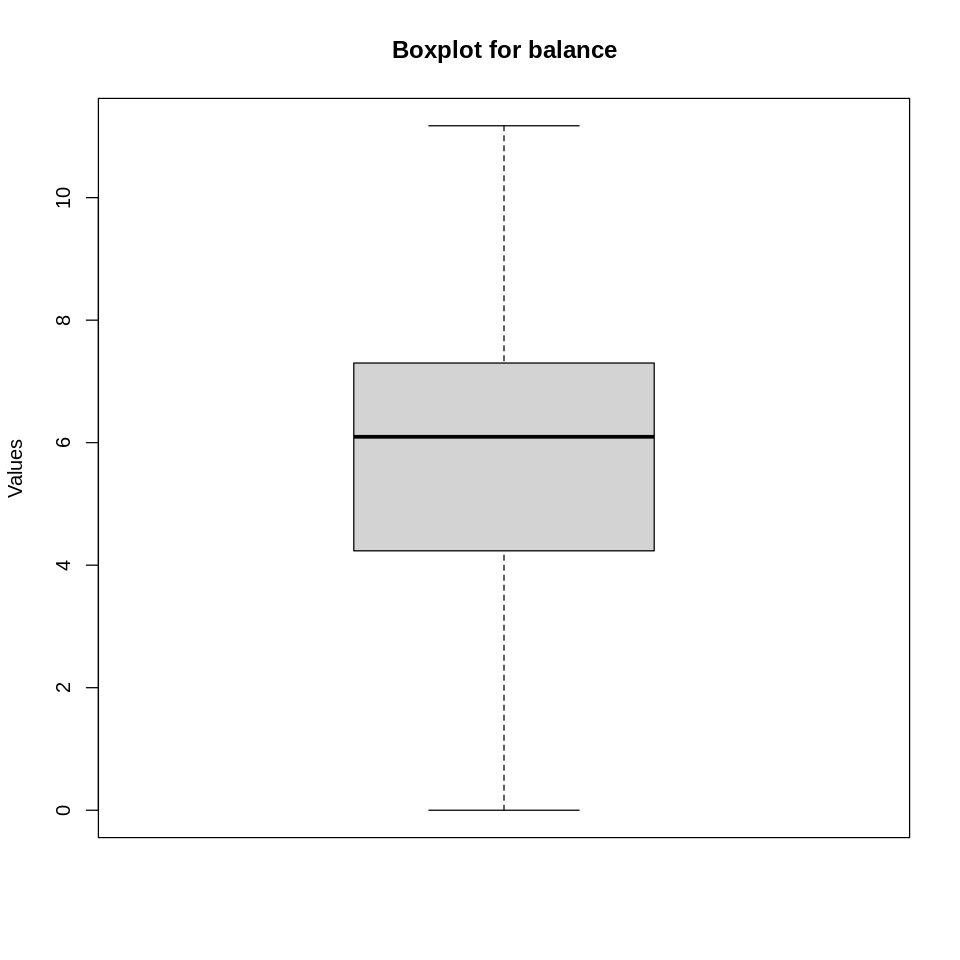

In [ ]:
# Dealing with balance variable
options(repr.plot.width=8, repr.plot.height=8)
bank$balance <- log(bank$balance)
summary(bank$balance)
boxplot(bank$balance, ylab="Values", main="Boxplot for balance")
# Outliers are eliminated

In [ ]:
# Dealing with age variable
bank$age <- log(bank$age)
# Dealing with campaign variable
bank$campaign <- log(bank$campaign)
outlied_log_camp <- boxplot.stats(bank$campaign)$out

# Delete all the obsrvations that create outliers (log-campaign)
bank <- bank[bank$campaign < min(outlied_log_camp),]

In [ ]:
# Dealing with categorical variables
dummies <- dummyVars( ~ ., data=bank, fullRank=T, drop2nd=T)
pred <- predict(dummies, newdata = school1)
bank <- data.table(pred)
str(bank)

Classes ‘data.table’ and 'data.frame':	4470 obs. of  42 variables:
 $ age               : num  3.4 3.5 3.56 3.4 4.08 ...
 $ jobblue-collar    : num  0 0 0 0 1 0 0 0 0 0 ...
 $ jobentrepreneur   : num  0 0 0 0 0 0 0 0 1 0 ...
 $ jobhousemaid      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ jobmanagement     : num  0 0 1 1 0 1 0 0 0 0 ...
 $ jobretired        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ jobself-employed  : num  0 0 0 0 0 0 1 0 0 0 ...
 $ jobservices       : num  0 1 0 0 0 0 0 0 0 1 ...
 $ jobstudent        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ jobtechnician     : num  0 0 0 0 0 0 0 1 0 0 ...
 $ jobunemployed     : num  1 0 0 0 0 0 0 0 0 0 ...
 $ jobunknown        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ maritalmarried    : num  1 1 0 1 1 0 1 1 1 1 ...
 $ maritalsingle     : num  0 0 1 0 0 1 0 0 0 0 ...
 $ educationsecondary: num  0 1 0 0 1 0 0 1 0 0 ...
 $ educationtertiary : num  0 0 1 1 0 1 1 0 1 0 ...
 $ educationunknown  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ defaultyes        : num  0 0 0 0 0 0 0 0 0 0

In [ ]:
colnames(bank)[2] <- 'jobbluecollar'
colnames(bank)[7] <- 'jobselfemployed'

bank$y <- as.factor(bank$y)

### Logistic Regression

In [ ]:
# LOGISTIC REGRESSION WITHOUT PDAYS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-37, -42)], collapse='+')))
ggrid <- expand.grid(.decay=c(0, 0.1, 0.01, 0.02, 0.05, 0.001, 0.0001, 0.0002, 0.0003))

modlog1 <- train(form, data = bank, method = "multinom", trControl = trainControl(method = "cv", number = 10), tuneGrid=ggrid, trace=F)

In [ ]:
print(modlog1)

Penalized Multinomial Regression 

4470 samples
  40 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4023, 4023, 4023, 4022, 4024, 4023, ... 
Resampling results across tuning parameters:

  decay  Accuracy   Kappa    
  0e+00  0.8899333  0.2035562
  1e-04  0.8899333  0.2035562
  2e-04  0.8899333  0.2035562
  3e-04  0.8899333  0.2035562
  1e-03  0.8899333  0.2035562
  1e-02  0.8901570  0.2042710
  2e-02  0.8903807  0.2048978
  5e-02  0.8903807  0.2051208
  1e-01  0.8897096  0.1974500

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was decay = 0.05.


In [ ]:
# LOGISTIC REGRESSION WITHOUT PREVIOUS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-38, -42)], collapse='+')))
ggrid <- expand.grid(.decay=c(0, 0.1, 0.01, 0.02, 0.05, 0.001, 0.0001, 0.0002, 0.0003))

modlog2 <- train(form, data = bank, method = "multinom", trControl = trainControl(method = "cv", number = 10), tuneGrid=ggrid, trace=F)
print(modlog2)

Penalized Multinomial Regression 

4470 samples
  40 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4023, 4023, 4023, 4022, 4024, 4023, ... 
Resampling results across tuning parameters:

  decay  Accuracy   Kappa    
  0e+00  0.8903807  0.2049274
  1e-04  0.8903807  0.2049274
  2e-04  0.8903807  0.2049274
  3e-04  0.8903807  0.2049274
  1e-03  0.8903807  0.2049274
  1e-02  0.8903807  0.2049274
  2e-02  0.8903807  0.2049274
  5e-02  0.8906044  0.2056588
  1e-01  0.8908281  0.2042165

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was decay = 0.1.


In [ ]:
# LOGISTIC REGRESSION WITHOUT PDAYS AND PREVIOUS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-37, -38, -42)], collapse='+')))
ggrid <- expand.grid(.decay=c(0, 0.1, 0.01, 0.02, 0.05, 0.001, 0.0001, 0.0002, 0.0003))

modlog3 <- train(form, data = bank, method = "multinom", trControl = trainControl(method = "cv", number = 10), tuneGrid=ggrid, trace=F)
print(modlog3)

Penalized Multinomial Regression 

4470 samples
  39 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4023, 4023, 4023, 4022, 4024, 4023, ... 
Resampling results across tuning parameters:

  decay  Accuracy   Kappa    
  0e+00  0.8901570  0.2042710
  1e-04  0.8901570  0.2042710
  2e-04  0.8901570  0.2042710
  3e-04  0.8901570  0.2042710
  1e-03  0.8901570  0.2042710
  1e-02  0.8903807  0.2049274
  2e-02  0.8903807  0.2049274
  5e-02  0.8906044  0.2055543
  1e-01  0.8906044  0.2017397

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was decay = 0.1.


### Support Vector Machines

#### Support Vector Classifier

In [ ]:
# SUPPORT VECTOR CLASSIFIER WITHOUT PDAYS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-37, -42)], collapse='+')))
ggrid <- expand.grid(.C=c(0.1, 0.5, 1, 1.5, 2, 5, 10))

modsvc1 <- train(form, data = bank, method = "svmLinear", trControl = trainControl(method = "cv", number = 10), tuneGrid=ggrid, trace=F)
print(modsvc1)

Support Vector Machines with Linear Kernel 

4470 samples
  40 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4023, 4023, 4023, 4022, 4024, 4023, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
   0.1  0.8921719  0.2182038
   0.5  0.8921719  0.2182038
   1.0  0.8921719  0.2182038
   1.5  0.8921719  0.2182038
   2.0  0.8921719  0.2182038
   5.0  0.8921719  0.2182038
  10.0  0.8921719  0.2182038

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was C = 0.1.


In [ ]:
# SUPPORT VECTOR CLASSIFIER WITHOUT PREVIOUS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-38, -42)], collapse='+')))

modsvc2 <- train(form, data = bank, method = "svmLinear", trControl = trainControl(method = "cv", number = 10), trace=F)
print(modsvc2)

Support Vector Machines with Linear Kernel 

4470 samples
  40 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4023, 4023, 4023, 4022, 4024, 4023, ... 
Resampling results:

  Accuracy   Kappa    
  0.8921719  0.2182038

Tuning parameter 'C' was held constant at a value of 1


In [ ]:
# SUPPORT VECTOR CLASSIFIER WITHOUT BOTH PDAYS AND PREVIOUS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-37, -38, -42)], collapse='+')))


modsvc3 <- train(form, data = bank, method = "svmLinear", trControl = trainControl(method = "cv", number = 10), trace=F)
print(modsvc3)

Support Vector Machines with Linear Kernel 

4470 samples
  39 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4023, 4023, 4023, 4022, 4024, 4023, ... 
Resampling results:

  Accuracy   Kappa    
  0.8921719  0.2182038

Tuning parameter 'C' was held constant at a value of 1


#### Polynomial Support Vector Machine

In [ ]:
# POLYNOMIAL SUPPORT VECTOR MACHINE WITHOUT PREVIOUS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-37, -42)], collapse='+')))
ggrid <- expand.grid(.degree=c(2, 3), .scale=c(0.01, 0.011, 0.012, 0.013, 0.014), .C=c(0.8, 1, 1.2, 1.4))

modpol1 <- train(form, data = bank, method = "svmPoly", trControl = trainControl(method = "cv", number = 5), tuneGrid=ggrid, trace=F)
print(modpol1)

Support Vector Machines with Polynomial Kernel 

4470 samples
  40 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 3577, 3576, 3576, 3575, 3576 
Resampling results across tuning parameters:

  degree  scale  C    Accuracy   Kappa    
  2       0.010  0.8  0.8926186  0.2267318
  2       0.010  1.0  0.8928424  0.2292376
  2       0.010  1.2  0.8928421  0.2311094
  2       0.010  1.4  0.8935135  0.2388461
  2       0.011  0.8  0.8928424  0.2292376
  2       0.011  1.0  0.8928421  0.2311094
  2       0.011  1.2  0.8935135  0.2388461
  2       0.011  1.4  0.8923947  0.2318455
  2       0.012  0.8  0.8930658  0.2318024
  2       0.012  1.0  0.8935135  0.2388461
  2       0.012  1.2  0.8926184  0.2325209
  2       0.012  1.4  0.8926179  0.2342762
  2       0.013  0.8  0.8935135  0.2388461
  2       0.013  1.0  0.8926184  0.2325209
  2       0.013  1.2  0.8926179  0.2342762
  2       0.013  1.4  0.8917230  0.2296714
  2       

In [ ]:
# POLYNOMIAL SUPPORT VECTOR MACHINE WITHOUT PDAYS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-38, -42)], collapse='+')))
ggrid <- expand.grid(.degree=2, .scale=c(0.012, 0.013, 0.014), .C=c(0.7, 0.8, 0.9))

modpol2 <- train(form, data = bank, method = "svmPoly", trControl = trainControl(method = "cv", number = 5), tuneGrid = ggrid, trace=F)
print(modpol2)
summary(modpol2)
names(modpol2)
modpol2$pred

Support Vector Machines with Polynomial Kernel 

4470 samples
  40 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 3577, 3576, 3576, 3575, 3576 
Resampling results across tuning parameters:

  scale  C    Accuracy   Kappa    
  0.012  0.7  0.8930661  0.2319122
  0.012  0.8  0.8930661  0.2319122
  0.012  0.9  0.8935138  0.2369743
  0.013  0.7  0.8930661  0.2319122
  0.013  0.8  0.8935138  0.2369743
  0.013  0.9  0.8930663  0.2337867
  0.014  0.7  0.8932900  0.2362813
  0.014  0.8  0.8935135  0.2389600
  0.014  0.9  0.8926184  0.2325606

Tuning parameter 'degree' was held constant at a value of 2
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were degree = 2, scale = 0.013 and C = 0.8.


Length  Class   Mode 
     1   ksvm     S4 

[1] "method"       "modelInfo"    "modelType"    "results"      "pred"        
 [6] "bestTune"     "call"         "dots"         "metric"       "control"     
[11] "finalModel"   "preProcess"   "trainingData" "resample"     "resampledCM" 
[16] "perfNames"    "maximize"     "yLimits"      "times"        "levels"      
[21] "terms"        "coefnames"    "xlevels"

NULL

In [ ]:
# POLYNOMIAL SUPPORT VECTOR MACHINE WITHOUT PREVIOUS AND PDAYS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-37, -38, -42)], collapse='+')))
ggrid <- expand.grid(.degree=2, .scale=c(0.012, 0.013, 0.014), .C=c(0.7, 0.8, 0.9))

modpol3 <- train(form, data = bank, method = "svmPoly", trControl = trainControl(method = "cv", number = 5), tuneGrid = ggrid, trace=F)
print(modpol3)

Support Vector Machines with Polynomial Kernel 

4470 samples
  39 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 3577, 3576, 3576, 3575, 3576 
Resampling results across tuning parameters:

  scale  C    Accuracy   Kappa    
  0.012  0.7  0.8928424  0.2292376
  0.012  0.8  0.8928424  0.2292376
  0.012  0.9  0.8930663  0.2316583
  0.013  0.7  0.8928424  0.2292376
  0.013  0.8  0.8930663  0.2337271
  0.013  0.9  0.8926184  0.2306835
  0.014  0.7  0.8928426  0.2330342
  0.014  0.8  0.8928421  0.2333122
  0.014  0.9  0.8923944  0.2301105

Tuning parameter 'degree' was held constant at a value of 2
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were degree = 2, scale = 0.013 and C = 0.8.


#### Radial Support Vector Machine

In [ ]:
# RADIAL SUPPORT VECTOR MACHINE WITHOUT PREVIOUS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-37, -42)], collapse='+')))
ggrid <- expand.grid(.C=c(0.8,0.9,1,1.1,1.2), .sigma=0.01816739)

modrad1 <- train(form, data = bank, method = "svmRadial", trControl = trainControl(method = "cv", number = 5), tuneGrid=ggrid, trace=F)
print(modrad1)

Support Vector Machines with Radial Basis Function Kernel 

4470 samples
  40 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 3577, 3576, 3576, 3575, 3576 
Resampling results across tuning parameters:

  C    Accuracy   Kappa    
  0.8  0.8888150  0.1674813
  0.9  0.8892632  0.1748288
  1.0  0.8899338  0.1807652
  1.1  0.8899338  0.1826270
  1.2  0.8897104  0.1816615

Tuning parameter 'sigma' was held constant at a value of 0.01816739
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.01816739 and C = 1.


In [ ]:
# RADIAL SUPPORT VECTOR MACHINE WITHOUT PDAYS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-38, -42)], collapse='+')))
ggrid <- expand.grid(.C=c(0.8,0.9,1,1.1,1.2), .sigma=0.01816739)

modrad2 <- train(form, data = bank, method = "svmRadial", trControl = trainControl(method = "cv", number = 5), tuneGrid=ggrid, trace=F)
print(modrad2)

Support Vector Machines with Radial Basis Function Kernel 

4470 samples
  40 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 3577, 3576, 3576, 3575, 3576 
Resampling results across tuning parameters:

  C    Accuracy   Kappa    
  0.8  0.8879207  0.1587188
  0.9  0.8883681  0.1683949
  1.0  0.8888155  0.1739165
  1.1  0.8890390  0.1763061
  1.2  0.8894869  0.1790200

Tuning parameter 'sigma' was held constant at a value of 0.01816739
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.01816739 and C = 1.2.


In [ ]:
# RADIAL SUPPORT VECTOR MACHINE WITHOUT PREVIOUS AND PDAYS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-37, -38, -42)], collapse='+')))

modrad3 <- train(form, data = bank, method = "svmRadial", trControl = trainControl(method = "cv", number = 5), trace=F)
print(modrad3)

Support Vector Machines with Radial Basis Function Kernel 

4470 samples
  39 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 3577, 3576, 3576, 3575, 3576 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.8863547  0.1016168
  0.50  0.8870258  0.1478371
  1.00  0.8890387  0.1725120

Tuning parameter 'sigma' was held constant at a value of 0.01845361
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.01845361 and C = 1.


### Random Forest

In [ ]:
# RANDOM FOREST USING RANGER WITHOUT PDAYS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-37, -42)], collapse='+')))

modrf1 <- train(form, data = bank, method = "ranger", trControl = trainControl(method = "cv", number = 10))
print(modrf1)

Random Forest 

4470 samples
  40 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4023, 4023, 4023, 4022, 4024, 4023, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa      
   2    gini        0.8845641  0.027197067
   2    extratrees  0.8838935  0.008713863
  21    gini        0.8881431  0.213770063
  21    extratrees  0.8856837  0.226463883
  40    gini        0.8859049  0.220248080
  40    extratrees  0.8832229  0.219108401

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 21, splitrule = gini
 and min.node.size = 1.


In [ ]:
# RANDOM FOREST USING RANGER WITHOUT PREVIOUS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-38, -42)], collapse='+')))

modrf2 <- train(form, data = bank, method = "ranger", trControl = trainControl(method = "cv", number = 10))
print(modrf2)

Random Forest 

4470 samples
  40 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4023, 4023, 4023, 4022, 4024, 4023, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa     
   2    gini        0.8845641  0.02155716
   2    extratrees  0.8843409  0.01258746
  21    gini        0.8872472  0.22722637
  21    extratrees  0.8852358  0.22434641
  40    gini        0.8854570  0.23197491
  40    extratrees  0.8850106  0.24472624

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 21, splitrule = gini
 and min.node.size = 1.


In [ ]:
# RANDOM FOREST USING RANGER WITHOUT PDAYS AND PREVIOUS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-37, -38, -42)], collapse='+')))

modrf3 <- train(form, data = bank, method = "ranger", trControl = trainControl(method = "cv", number = 10))
print(modrf3)

Random Forest 

4470 samples
  39 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4023, 4023, 4023, 4022, 4024, 4023, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa     
   2    gini        0.8843409  0.02114750
   2    extratrees  0.8845646  0.01590936
  20    gini        0.8876951  0.21768432
  20    extratrees  0.8865776  0.23149461
  39    gini        0.8874709  0.23729695
  39    extratrees  0.8838925  0.22046803

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 20, splitrule = gini
 and min.node.size = 1.


### Boosting

#### AdaBoost.M1

In [ ]:
# ADABOOST WITHOUT PDAYS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-37, -42)], collapse='+')))
ggrid <- expand.grid(.mfinal=c(1,2), .maxdepth=c(1,2,3,4), .coeflearn="Freund")

modada <- train(form, data = bank, method = "AdaBoost.M1", trControl = trainControl(method = "cv", number = 5), tuneGrid=ggrid)
print(modada)

AdaBoost.M1 

4470 samples
  40 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 3577, 3576, 3576, 3575, 3576 
Resampling results across tuning parameters:

  maxdepth  mfinal  Accuracy   Kappa    
  1         1       0.8921715  0.2196522
  1         2       0.8921715  0.2196522
  2         1       0.8932895  0.2148174
  2         2       0.8932895  0.2148174
  3         1       0.8888153  0.1912171
  3         2       0.8888153  0.1912171
  4         1       0.8883666  0.1927127
  4         2       0.8883666  0.1927127

Tuning parameter 'coeflearn' was held constant at a value of Freund
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mfinal = 1, maxdepth = 2 and
 coeflearn = Freund.


In [ ]:
# ADABOOST WITHOUT PREVIOUS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-38, -42)], collapse='+')))
ggrid <- expand.grid(.mfinal=c(1,2), .maxdepth=c(1,2,3,4), .coeflearn="Freund")

modada2 <- train(form, data = bank, method = "AdaBoost.M1", trControl = trainControl(method = "cv", number = 10), tuneGrid=ggrid)
print(modada2)

AdaBoost.M1 

4470 samples
  40 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4023, 4023, 4023, 4022, 4024, 4023, ... 
Resampling results across tuning parameters:

  maxdepth  mfinal  Accuracy   Kappa    
  1         1       0.8921719  0.2182038
  1         2       0.8921719  0.2182038
  2         1       0.8910523  0.2098896
  2         2       0.8910523  0.2098896
  3         1       0.8885920  0.1983325
  3         2       0.8885920  0.1983325
  4         1       0.8872482  0.1830356
  4         2       0.8872482  0.1830356

Tuning parameter 'coeflearn' was held constant at a value of Freund
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mfinal = 1, maxdepth = 1 and
 coeflearn = Freund.


In [ ]:
# ADABOOST WITHOUT PDAYS AND PREVIOUS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-37, -38, -42)], collapse='+')))
ggrid <- expand.grid(.mfinal=c(1,2), .maxdepth=c(1,2,3,4), .coeflearn="Freund")

modada3 <- train(form, data = bank, method = "AdaBoost.M1", trControl = trainControl(method = "cv", number = 10), tuneGrid=ggrid)
print(modada3)

AdaBoost.M1 

4470 samples
  39 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4023, 4023, 4023, 4022, 4024, 4023, ... 
Resampling results across tuning parameters:

  maxdepth  mfinal  Accuracy   Kappa    
  1         1       0.8921719  0.2182038
  1         2       0.8921719  0.2182038
  2         1       0.8910523  0.2098896
  2         2       0.8910523  0.2098896
  3         1       0.8894869  0.1937402
  3         2       0.8894869  0.1937402
  4         1       0.8865756  0.1733387
  4         2       0.8865756  0.1733387

Tuning parameter 'coeflearn' was held constant at a value of Freund
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mfinal = 1, maxdepth = 1 and
 coeflearn = Freund.


#### XGBoost

In [ ]:
# XGBOOST WITHOUT PDAYS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-37, -42)], collapse='+')))
ggrid <- expand.grid(.nrounds=30, .max_depth=5, .gamma=c(0.9, 1, 1.1), .eta=0.1, .colsample_bytree=c(0.9, 1), .min_child_weight=c(0, 0.05), .subsample=c(0.1, 0.2))

modada <- train(form, data = bank, method = "xgbTree", trControl = trainControl(method = "cv", number = 10), tuneGrid=ggrid)
print(modada)

eXtreme Gradient Boosting 

4470 samples
  40 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4023, 4023, 4023, 4022, 4024, 4023, ... 
Resampling results across tuning parameters:

  gamma  colsample_bytree  min_child_weight  subsample  Accuracy   Kappa    
  0.9    0.9               0.00              0.1        0.8903817  0.1749578
  0.9    0.9               0.00              0.2        0.8932875  0.2056004
  0.9    0.9               0.05              0.1        0.8903817  0.1812976
  0.9    0.9               0.05              0.2        0.8888137  0.1773723
  0.9    1.0               0.00              0.1        0.8910503  0.1870580
  0.9    1.0               0.00              0.2        0.8901570  0.1918858
  0.9    1.0               0.05              0.1        0.8910514  0.2019557
  0.9    1.0               0.05              0.2        0.8881426  0.1649681
  1.0    0.9               0.00              0.1        0

In [ ]:
# XGBOOST WITHOUT PREVIOUS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-38, -42)], collapse='+')))
ggrid <- expand.grid(.nrounds=30, .max_depth=5, .gamma=0.9, .eta=0.1, .colsample_bytree=0.9, .min_child_weight=0, .subsample=0.2)

modada <- train(form, data = bank, method = "xgbTree", trControl = trainControl(method = "cv", number = 10), tuneGrid=ggrid)
print(modada)

eXtreme Gradient Boosting 

4470 samples
  40 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4023, 4023, 4023, 4022, 4024, 4023, ... 
Resampling results:

  Accuracy   Kappa   
  0.8912756  0.201929

Tuning parameter 'nrounds' was held constant at a value of 30
Tuning
 held constant at a value of 0
Tuning parameter 'subsample' was held
 constant at a value of 0.2


In [ ]:
# XGBOOST WITHOUT PDAYS AND PREVIOUS
set.seed(15)
form <- as.formula(paste('y ~', paste(colnames(bank)[c(-37, -38, -42)], collapse='+')))
ggrid <- expand.grid(.nrounds=30, .max_depth=5, .gamma=0.9, .eta=0.1, .colsample_bytree=0.9, .min_child_weight=0, .subsample=0.2)

modada <- train(form, data = bank, method = "xgbTree", trControl = trainControl(method = "cv", number = 10), tuneGrid=ggrid)
print(modada)

eXtreme Gradient Boosting 

4470 samples
  39 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4023, 4023, 4023, 4022, 4024, 4023, ... 
Resampling results:

  Accuracy   Kappa    
  0.8906034  0.1909597

Tuning parameter 'nrounds' was held constant at a value of 30
Tuning
 held constant at a value of 0
Tuning parameter 'subsample' was held
 constant at a value of 0.2
